In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
from heapq import merge
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\niick\studyanalysis\transformations.py:1924: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


## Create DF for VICON data

In [24]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study4H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in file])

file = Path("study1H.csv")
GROUP=file.name.split("H")[0]
d_df = pd.read_csv(file)
d_df['GROUP'] = GROUP

file2 = Path("study2H.csv")
GROUP2=file2.name.split("H")[0]
d_df2 = pd.read_csv(file2)
d_df2['GROUP'] = GROUP2


# data_df = d_df.append(d_df2, ignore_index=True)
data_df = pd.concat([d_df, d_df2], ignore_index=True, sort=False)

data_df
# csv_files = Path("").glob("*H.csv")
# print(csv_files)
# data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files])
# data_df['GROUP'] = 

,Frame,Sub Frame,1RX,1RY,1RZ,1TX,1TY,1TZ,2RX,2RY,...,4TX,4TY,4TZ,5RX,5RY,5RZ,5TX,5TY,5TZ,GROUP
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-86.220253,818.517395,1798.021973,1.212219,0.045618,2.532513,-38.479145,855.451111,1773.667480,study1
1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-86.903648,819.127197,1798.149170,1.213007,0.045643,2.532513,-39.157539,856.090454,1773.793701,study1
2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-87.555389,819.722473,1798.270142,1.213187,0.046975,2.532139,-39.863754,856.770325,1773.937378,study1
3,4,0,2.425969,0.099261,0.971988,-723.095154,-749.753662,1761.347290,NaN,NaN,...,-88.151741,820.284424,1798.372803,1.212633,0.047152,2.531915,-40.523148,857.447632,1774.108154,study1
4,5,0,2.426525,0.098838,0.971306,-723.002930,-749.562805,1761.383179,NaN,NaN,...,-88.929825,820.954712,1798.596069,1.212393,0.046770,2.531485,-41.103912,857.965637,1774.213135,study1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135664,76351,0,0.088994,-0.806801,1.892411,-3132.166260,1553.572876,758.670349,0.122645,0.111159,...,-3269.663818,1826.473999,753.561951,NaN,NaN,NaN,NaN,NaN,NaN,study2
135665,76352,0,0.089093,-0.806849,1.892307,-3132.148682,1553.546021,758.634644,0.083013,0.096077,...,-3269.582520,1826.488403,753.573547,NaN,NaN,NaN,NaN,NaN,NaN,study2
135666,76353,0,0.088678,-0.806874,1.892549,-3132.178223,1553.566040,758.684753,0.082147,0.097031,...,-3269.576660,1826.459229,753.591125,NaN,NaN,NaN,NaN,NaN,NaN,study2
135667,76354,0,0.089243,-0.807042,1.892517,-3132.149658,1553.575806,758.667725,0.084404,0.097384,...,-3269.669678,1826.570068,753.547241,NaN,NaN,NaN,NaN,NaN,NaN,study2


In [25]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

In [21]:
data_df.columns

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP'],
      dtype='object')

##### Distance - plot distance from person to person

In [180]:
df_dist= pd.DataFrame()  

print(data_df['Frame'].values)
OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist['GROUP'] = data_df['GROUP']
df_dist["Frame2"] = data_df['Frame'].astype(int)

df_dist

[    1     2     3 ... 76353 76354 76355]


,distance_1_2,distance_1_3,distance_1_4,distance_1_5,distance_2_1,distance_2_3,distance_2_4,distance_2_5,distance_3_1,distance_3_2,...,distance_4_2,distance_4_3,distance_4_5,distance_5_1,distance_5_2,distance_5_3,distance_5_4,Frame,GROUP,Frame2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304953,0.015651,NaN,NaN,0.337375,0.015651,0,study1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304760,0.015658,NaN,NaN,0.337144,0.015658,1,study1,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304587,0.015660,NaN,NaN,0.336917,0.015660,2,study1,3
3,NaN,0.666053,0.490806,0.470107,NaN,NaN,NaN,NaN,0.666053,NaN,...,NaN,0.304407,0.015667,0.470107,NaN,0.336674,0.015667,3,study1,4
4,NaN,0.666010,0.490840,0.470117,NaN,NaN,NaN,NaN,0.666010,NaN,...,NaN,0.304197,0.015686,0.470117,NaN,0.336485,0.015686,4,study1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135664,0.324044,0.374583,0.088081,NaN,0.324044,0.032301,0.289354,NaN,0.374583,0.032301,...,0.289354,0.303902,NaN,NaN,NaN,NaN,NaN,135664,study2,76351
135665,0.324168,0.374839,0.088083,NaN,0.324168,0.032454,0.289494,NaN,0.374839,0.032454,...,0.289494,0.304161,NaN,NaN,NaN,NaN,NaN,135665,study2,76352
135666,0.324120,0.375062,0.088066,NaN,0.324120,0.032767,0.289455,NaN,0.375062,0.032767,...,0.289455,0.304402,NaN,NaN,NaN,NaN,NaN,135666,study2,76353
135667,0.324202,0.374805,0.088108,NaN,0.324202,0.032392,0.289510,NaN,0.374805,0.032392,...,0.289510,0.304106,NaN,NaN,NaN,NaN,NaN,135667,study2,76354


### Plot location

10000   -1442.157959
10001   -1442.608643
10002   -1443.224365
10003   -1443.643066
10004   -1443.928589
            ...     
59309    1019.692566
59310    1528.373535
59311    1527.615112
59312    1527.082031
59313    1526.210327
Name: 5TX, Length: 49314, dtype: float64


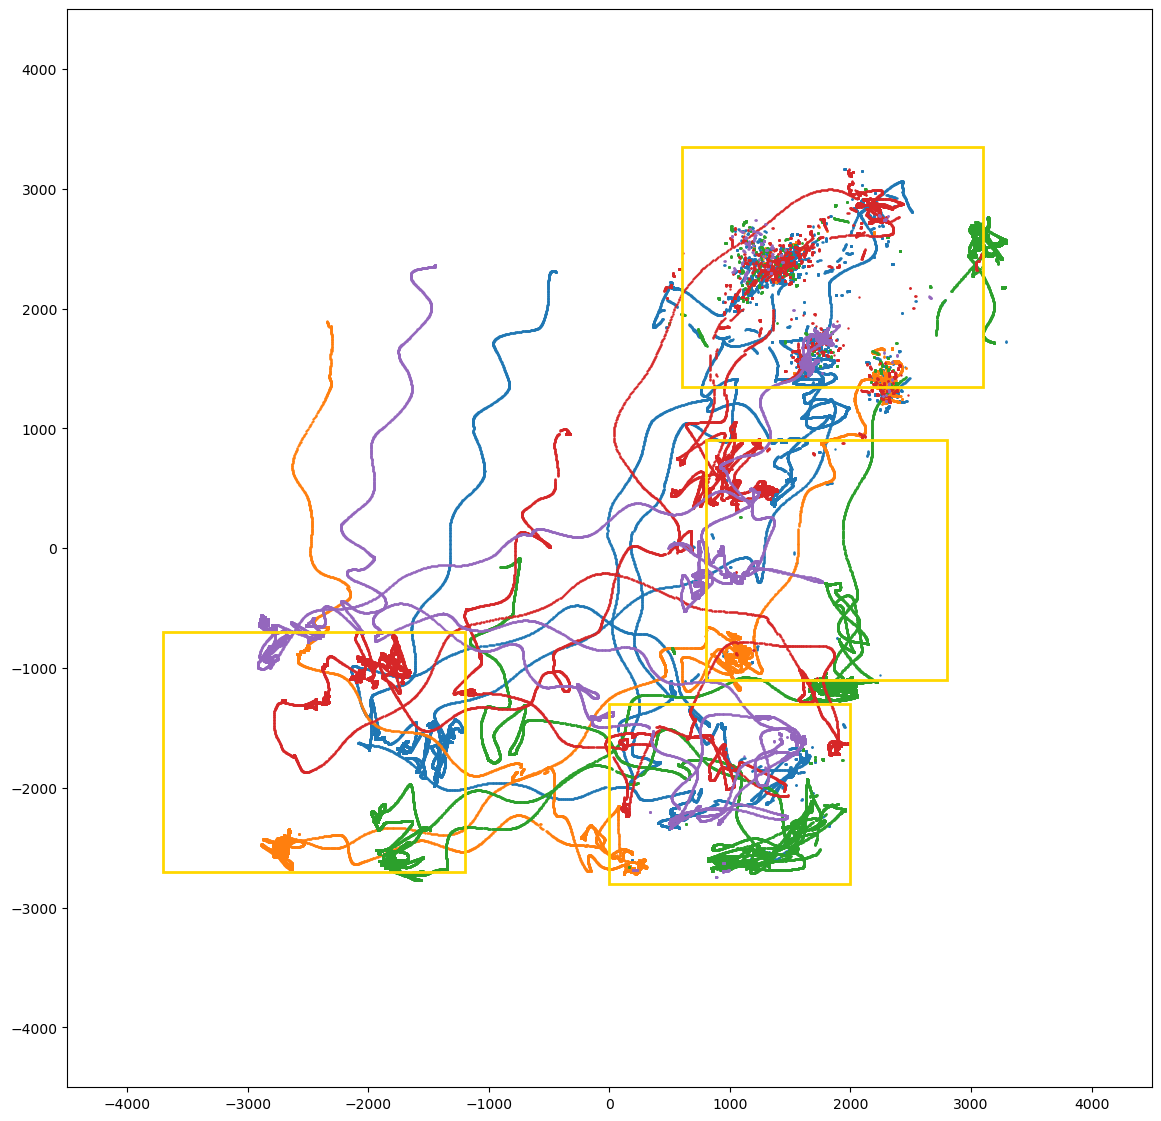

10000   -1320.150757
10001   -1319.952881
10002   -1319.769165
10003   -1319.582275
10004   -1319.413452
            ...     
76350            NaN
76351            NaN
76352            NaN
76353            NaN
76354            NaN
Name: 5TX, Length: 66355, dtype: float64


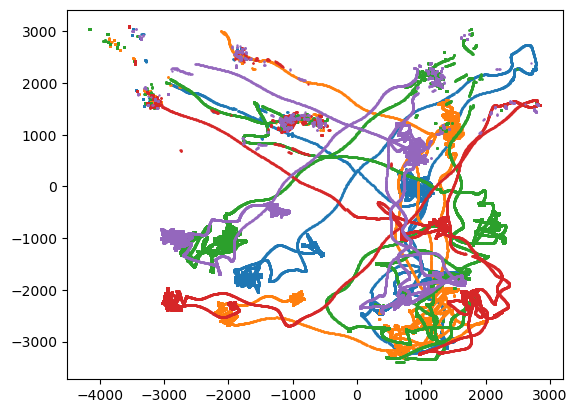

10000   -1445.514648
10001   -1445.390259
10002   -1445.977295
10003   -1446.026123
10004   -1445.925415
            ...     
48970    1282.454346
48971    1278.942993
48972    1275.679932
48973    1272.850464
48974    1269.163818
Name: 5TX, Length: 38975, dtype: float64


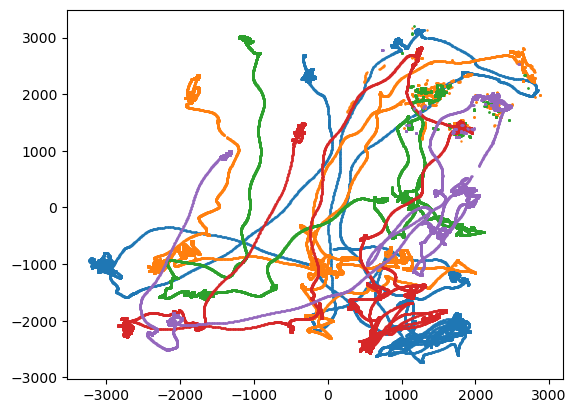

10000     410.397247
10001     411.878571
10002     413.324554
10003     414.709473
10004     416.060822
            ...     
73044    2604.039062
73045    2604.049805
73046    2604.036621
73047    2604.043701
73048    2604.054199
Name: 5TX, Length: 63049, dtype: float64


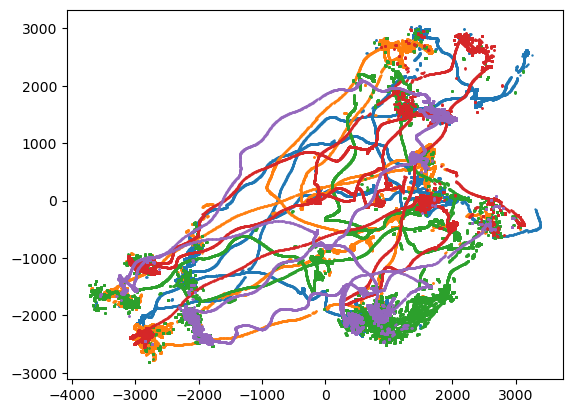

10000   -2343.827148
10001   -2343.745850
10002   -2343.613037
10003   -2343.480469
10004   -2343.310791
            ...     
46479     700.212280
46480     698.153992
46481     694.938049
46482    2513.056885
46483    2513.210693
Name: 5TX, Length: 36484, dtype: float64


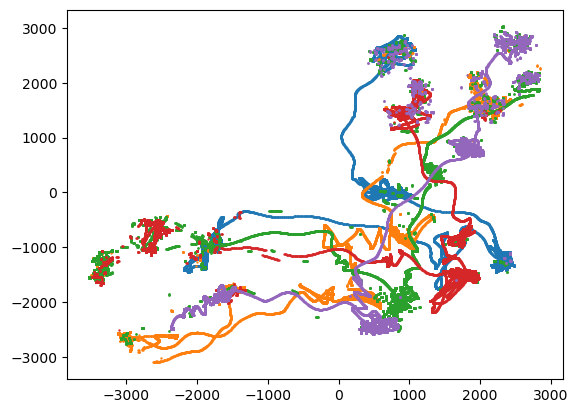

10000   -285.237427
10001   -285.258026
10002   -285.380920
10003   -285.289642
10004   -285.168915
            ...    
80113    663.993103
80114    663.992859
80115    663.987854
80116    663.994568
80117    663.986206
Name: 5TX, Length: 70118, dtype: float64


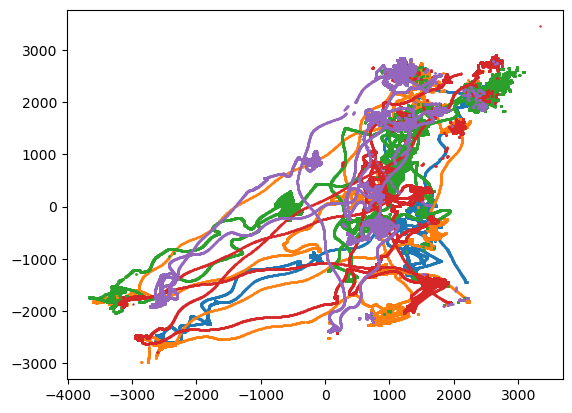

In [7]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

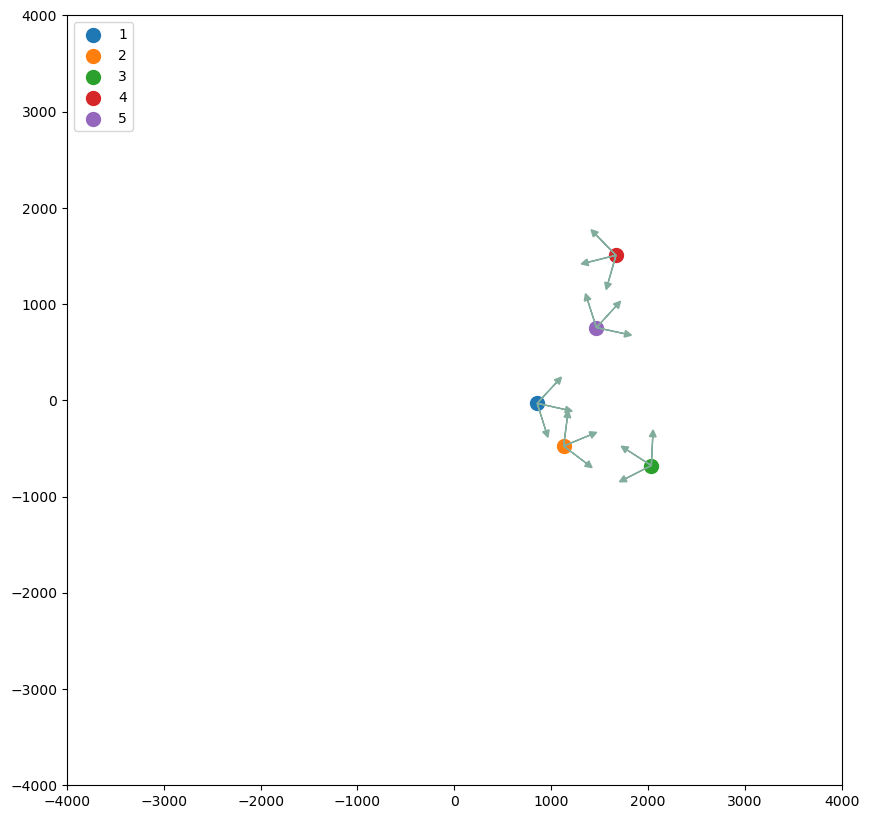

47080


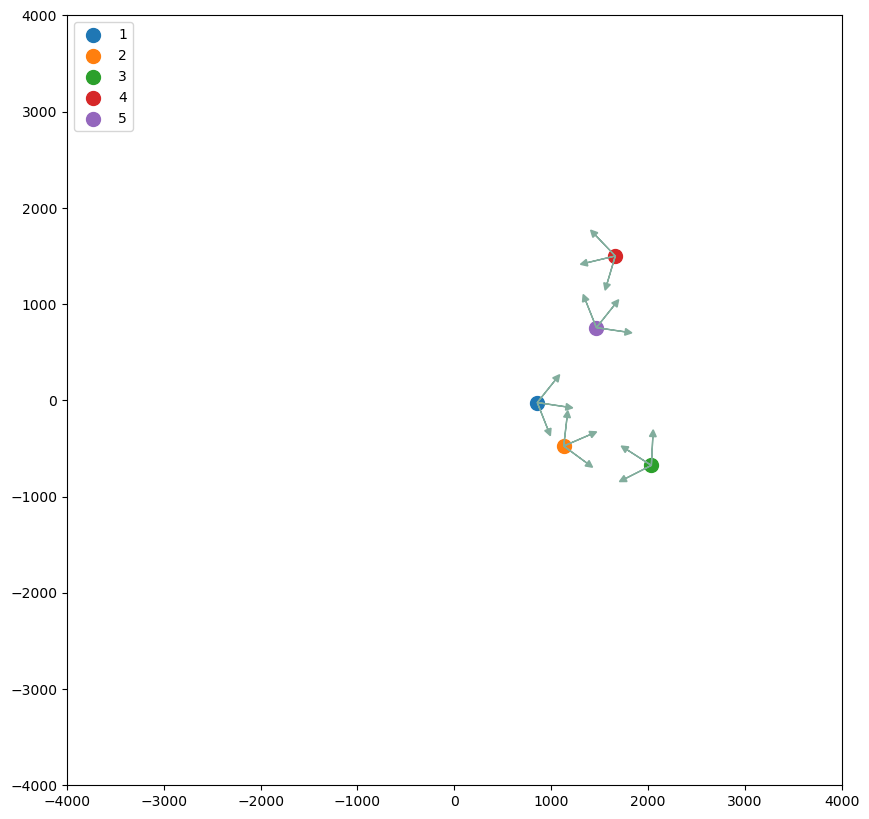

47085


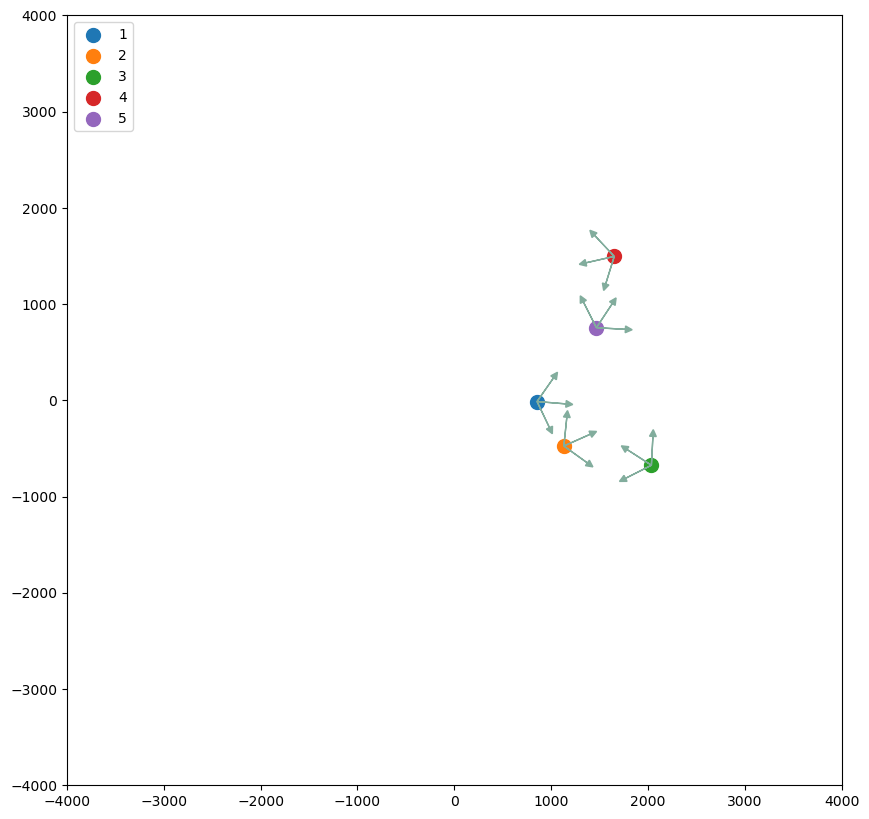

47090


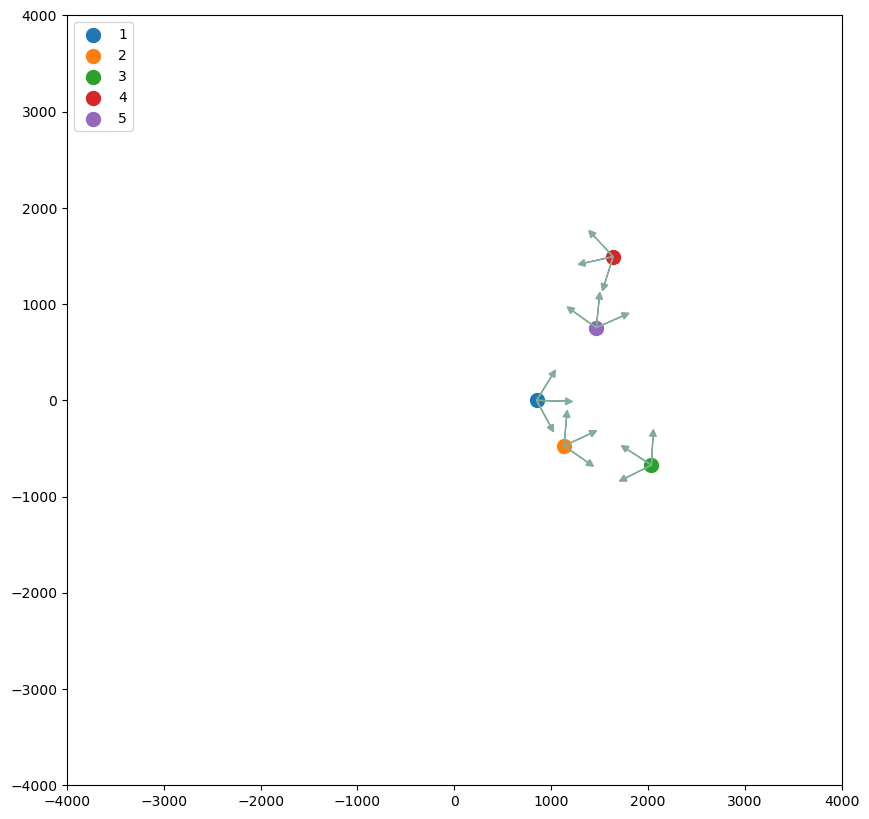

47095


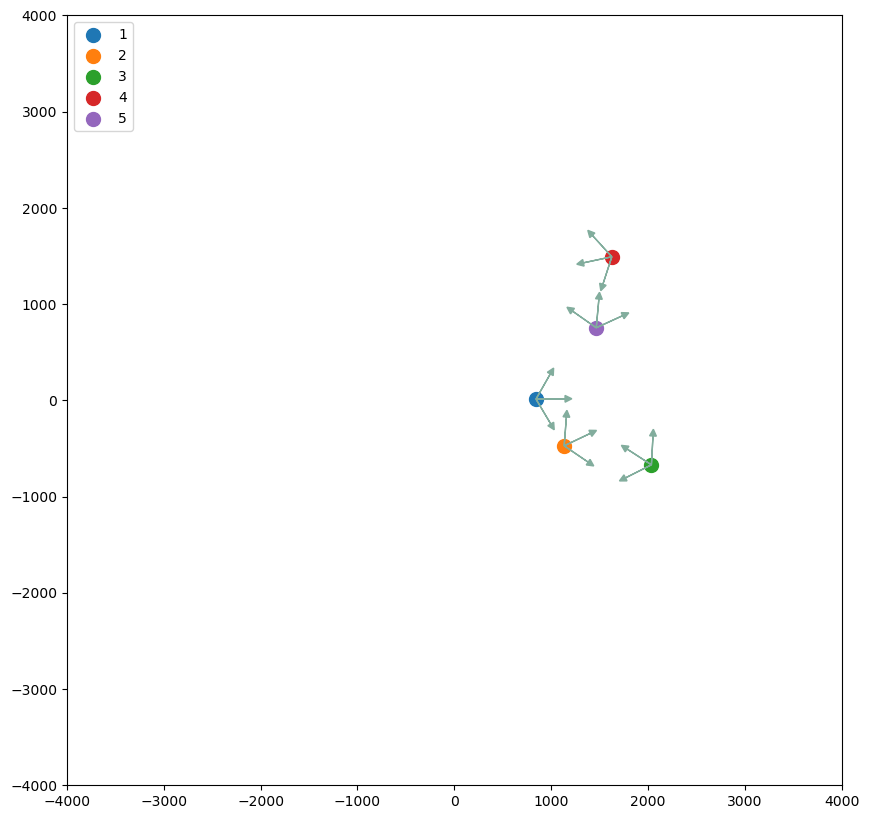

47100


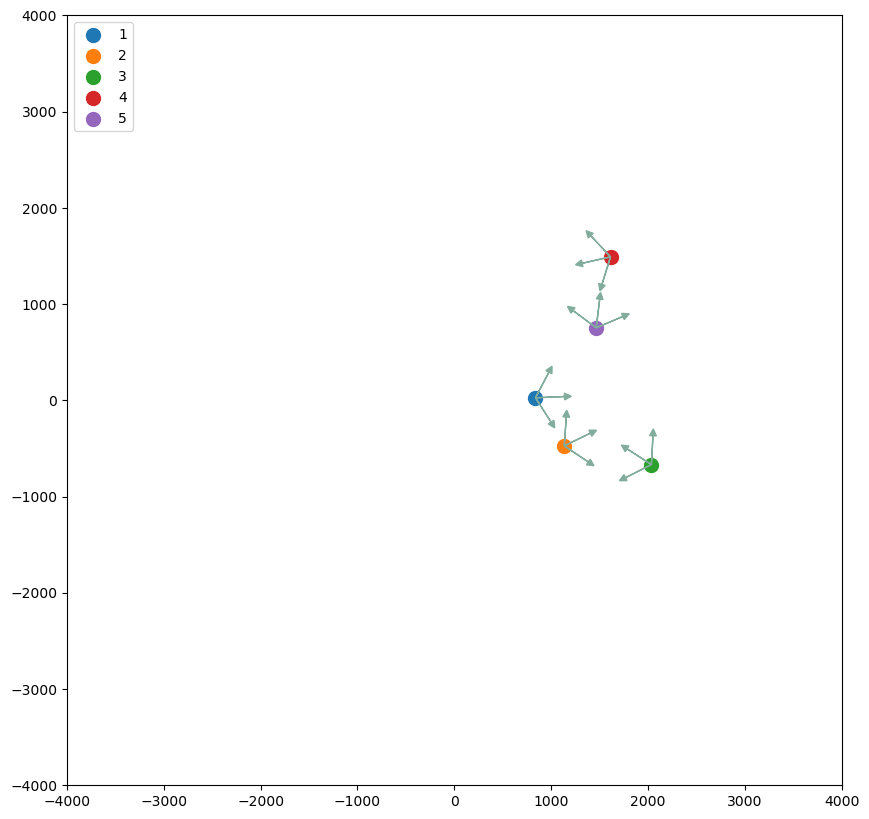

47105


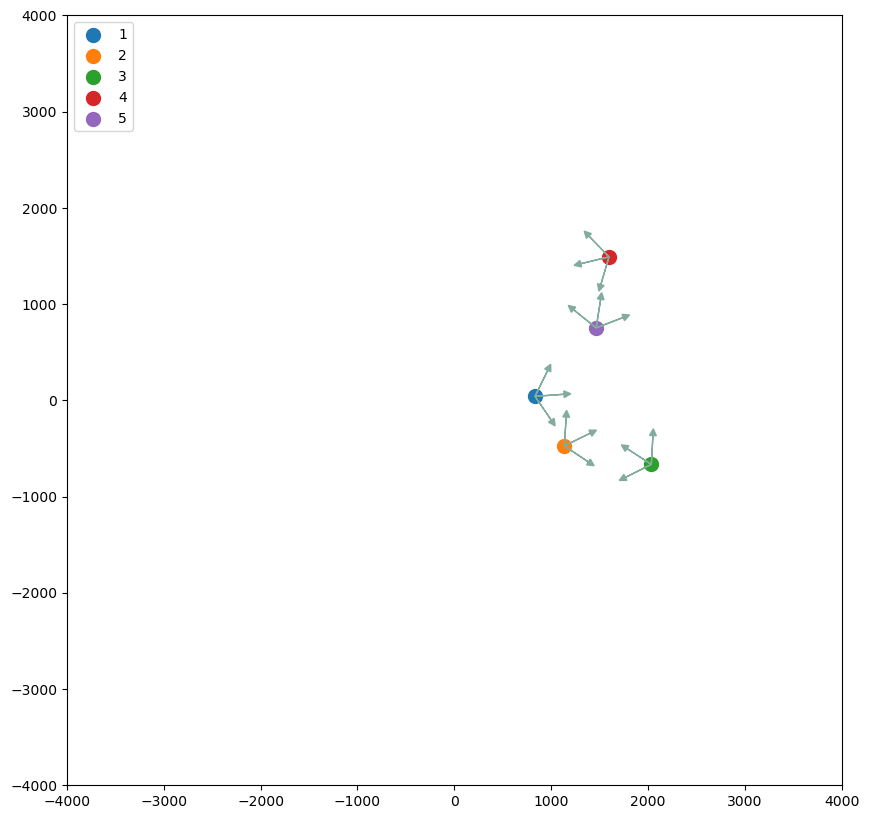

47110


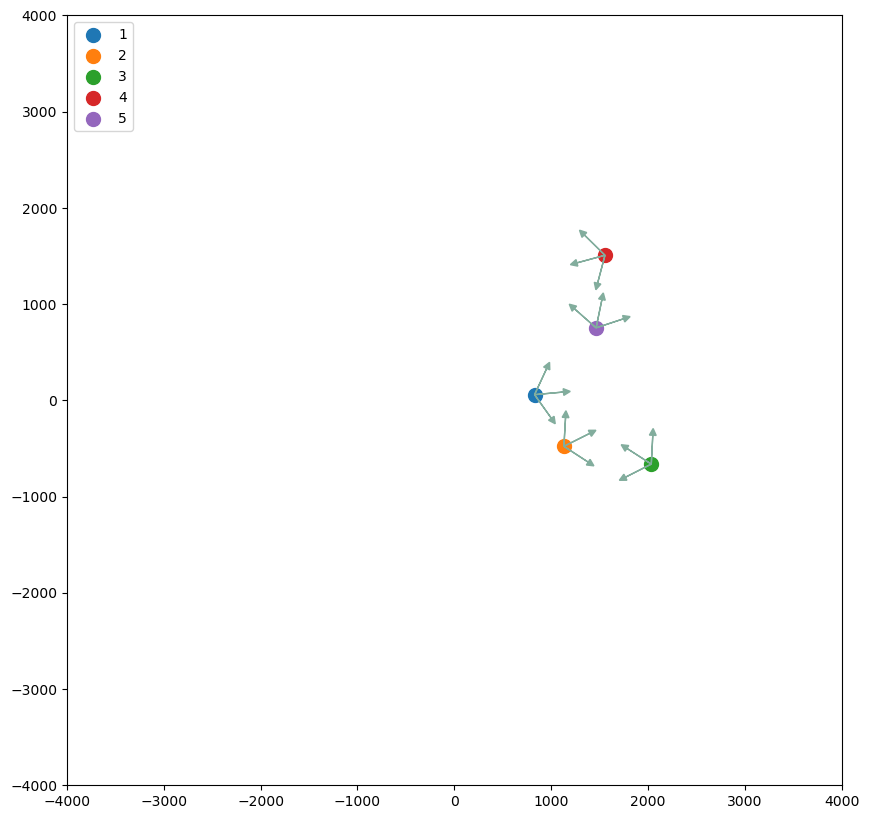

47115


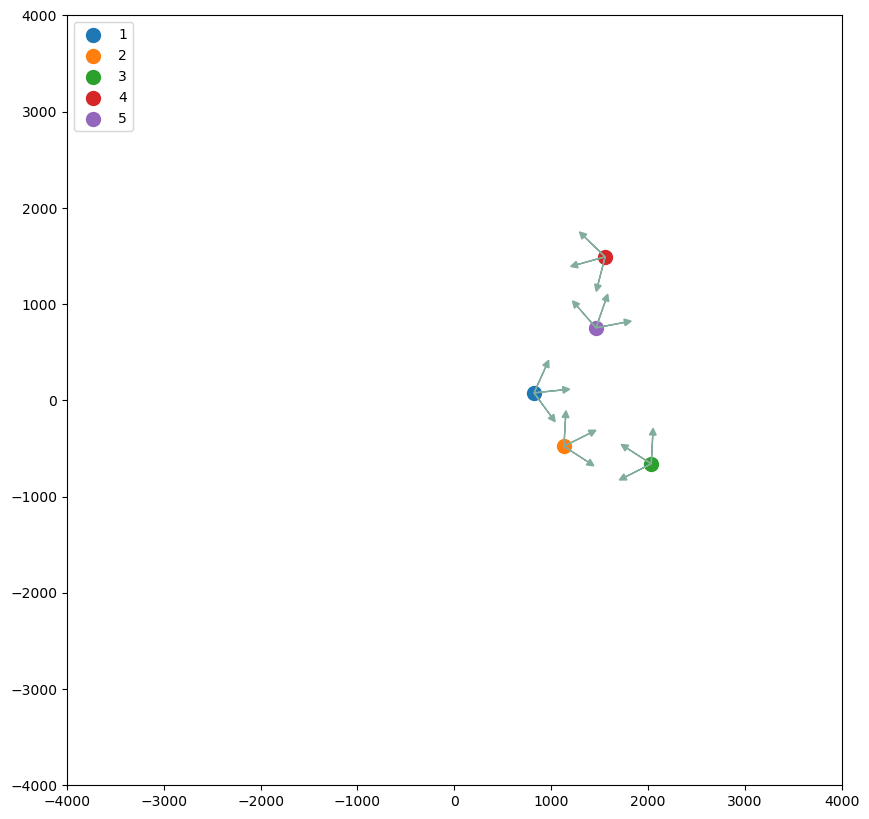

47120


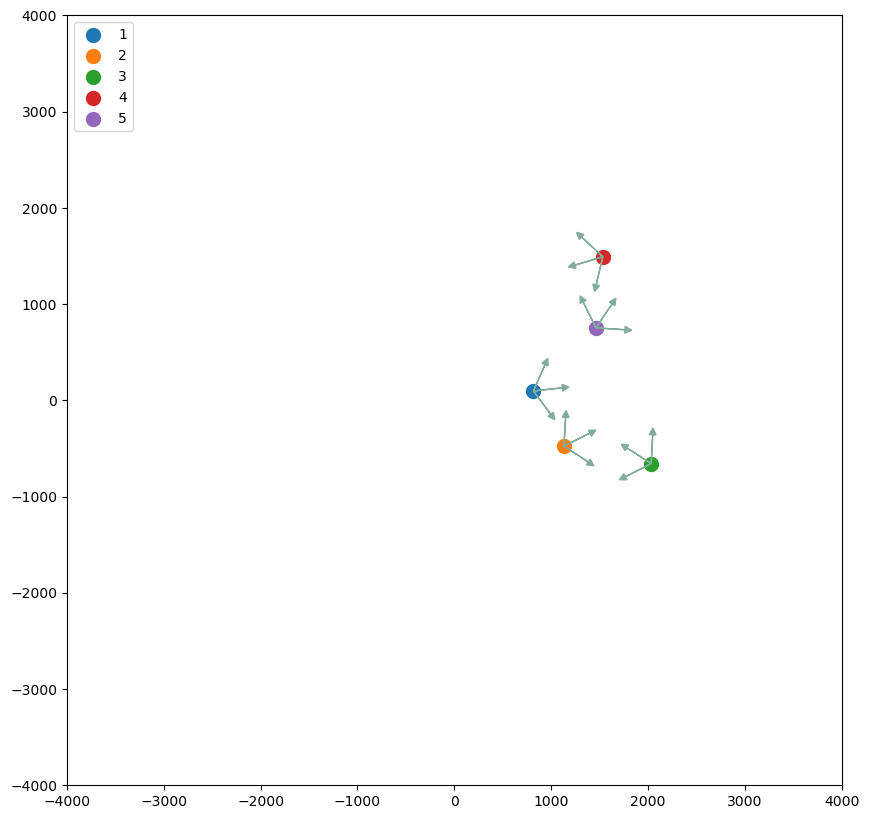

47125


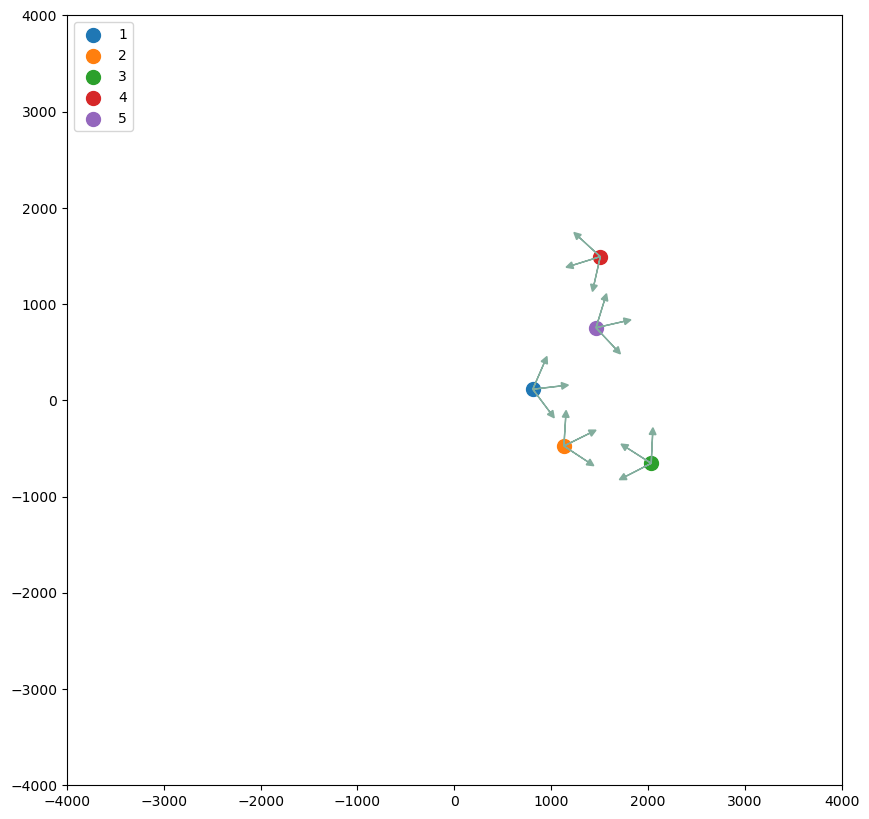

47130


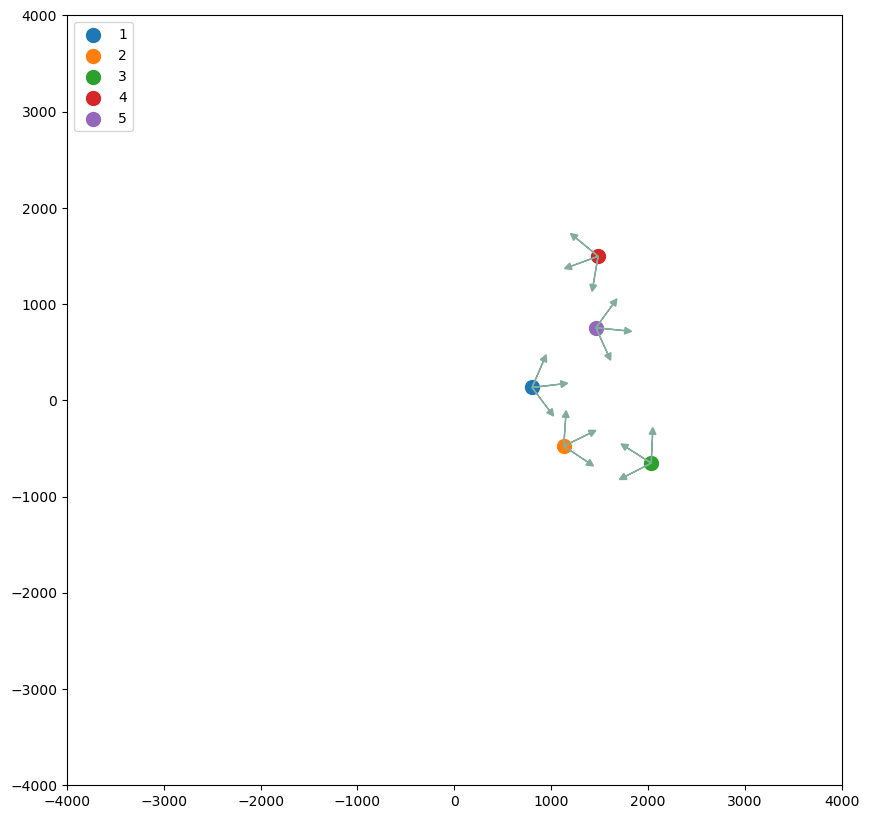

47135


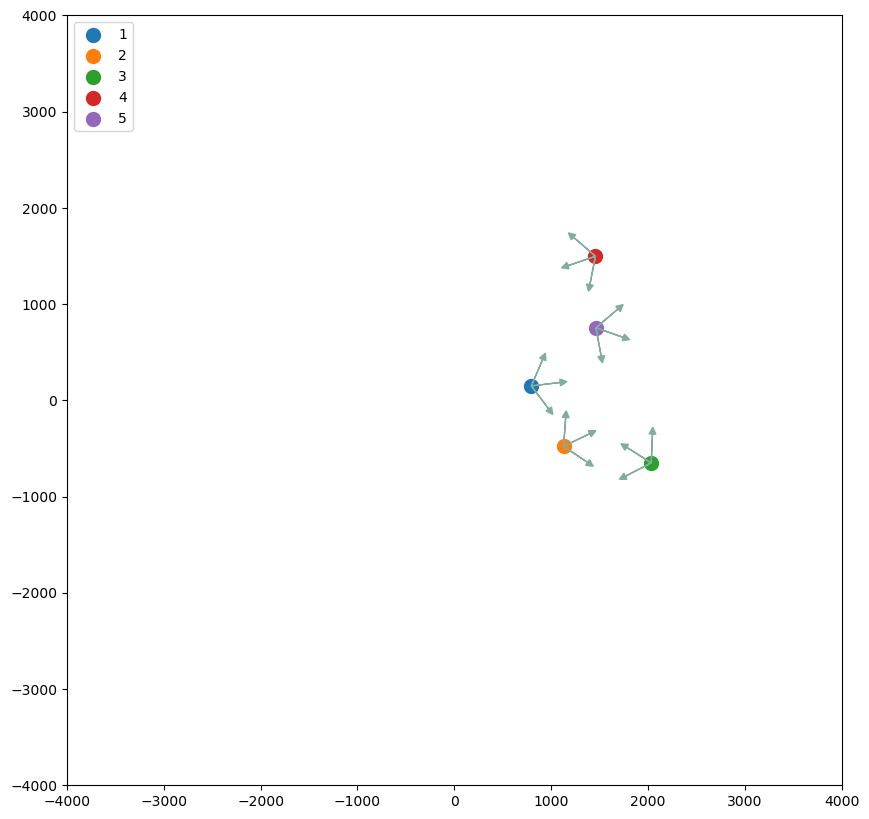

47140


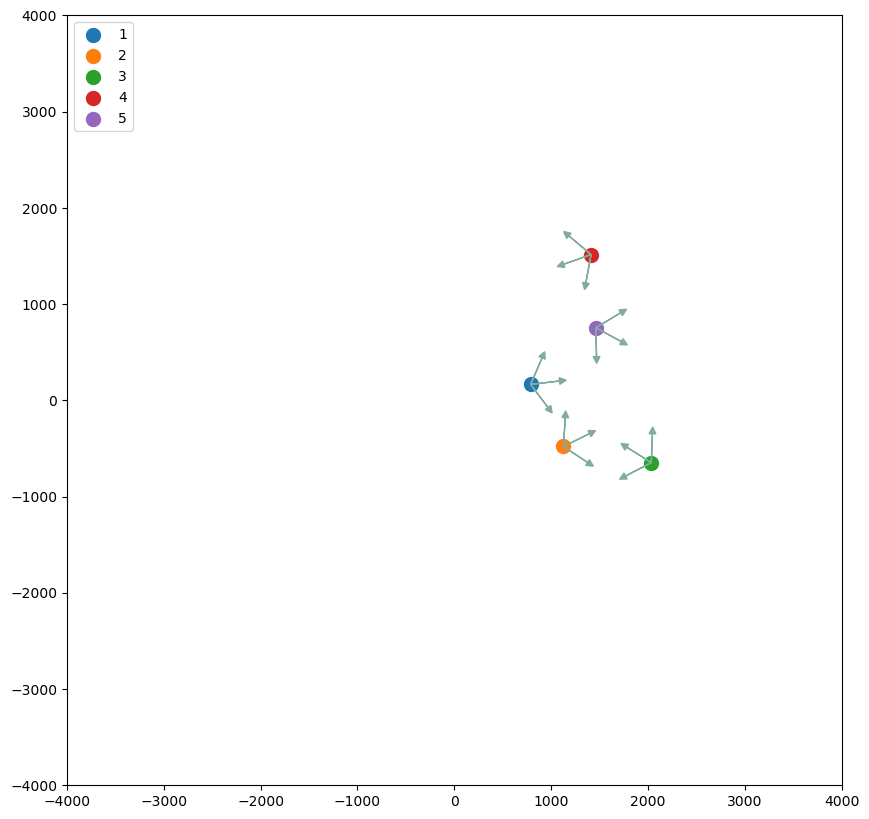

47145


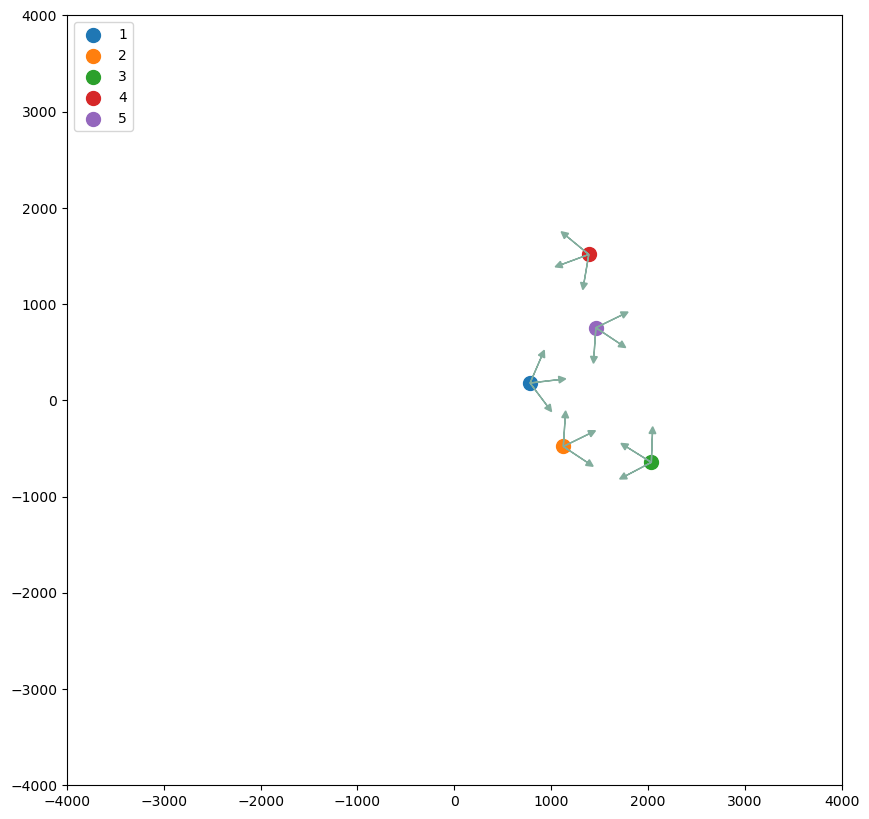

47150


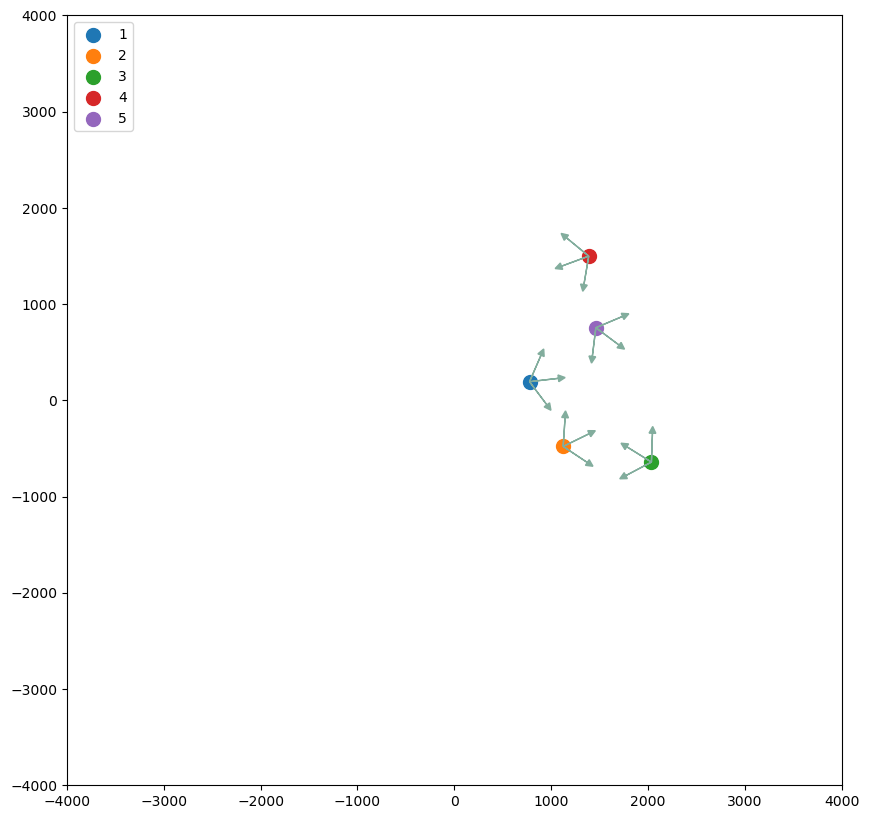

47155


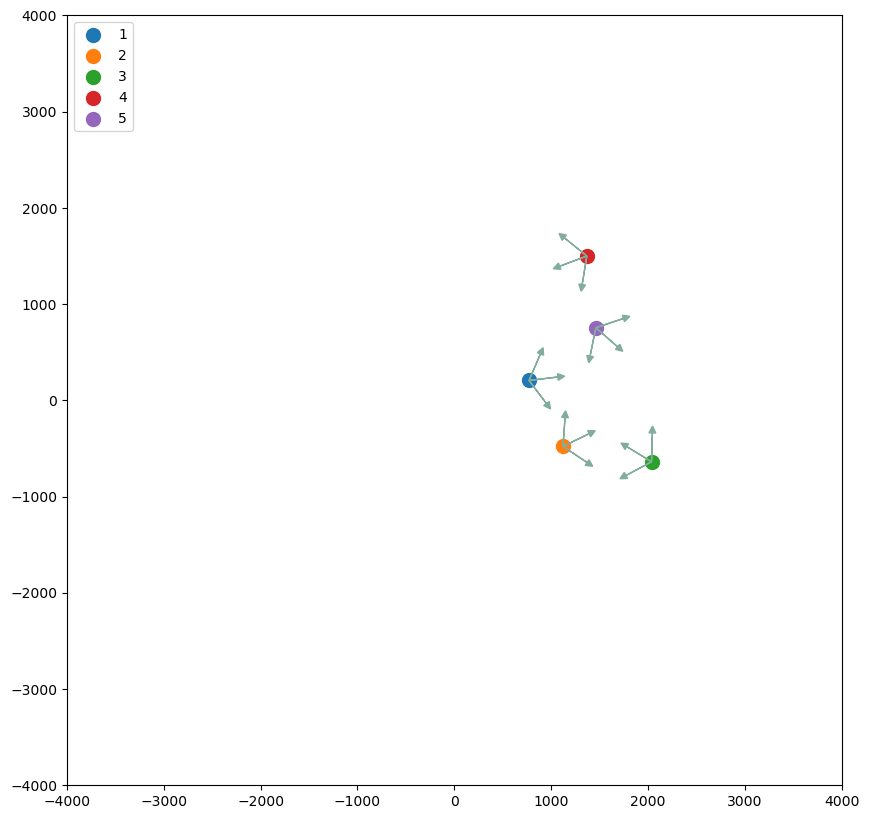

47160


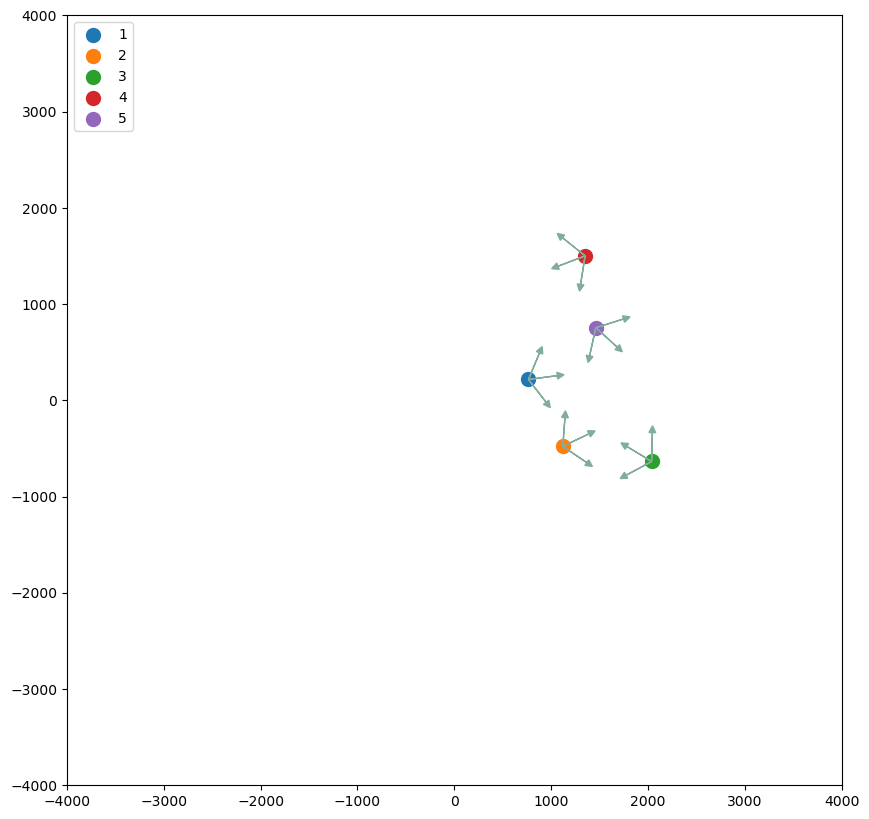

47165


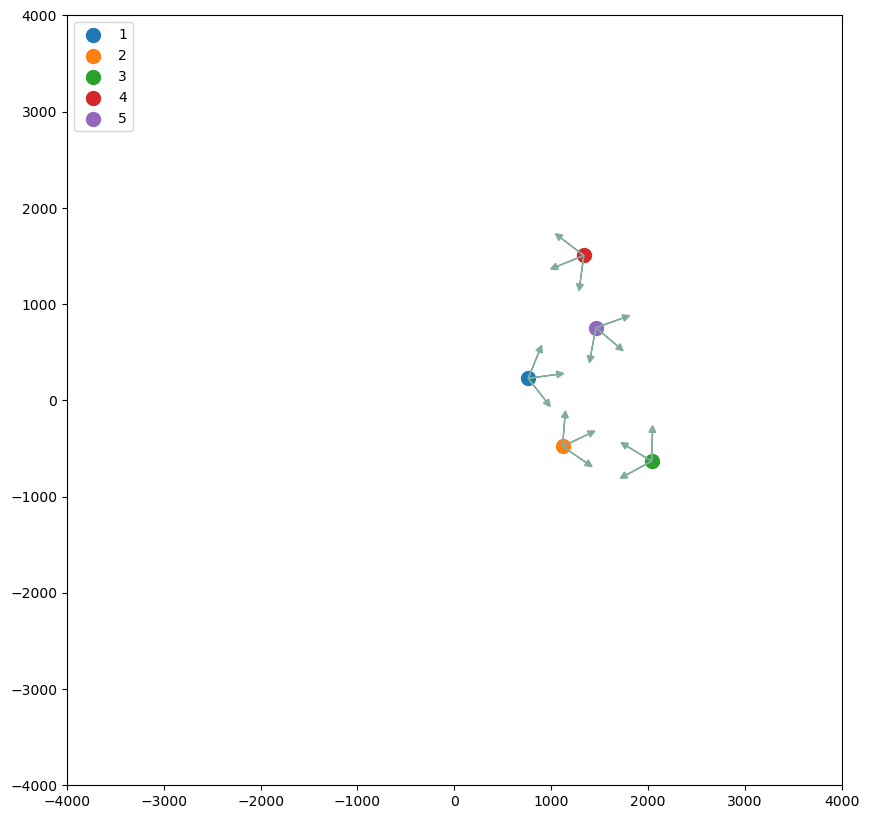

47170


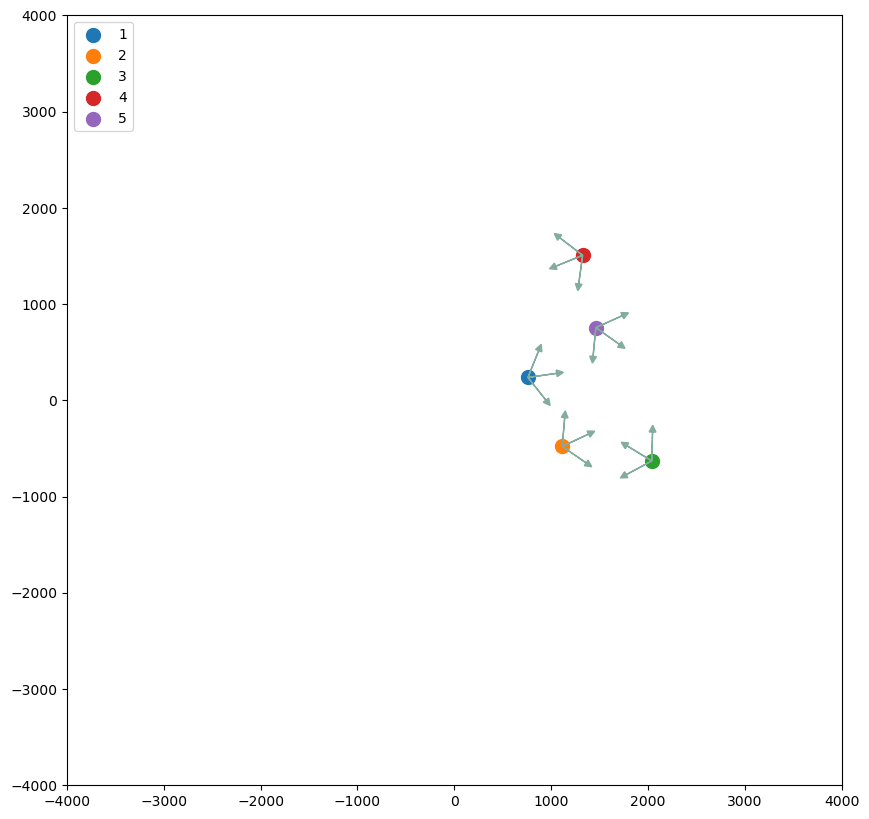

47175


In [904]:
fov_angle = math.radians(60)
start = 47080
end = 47180
length = 300

for index, row in data_df.iloc[start:end:5].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))

    for i in range(1, 6):
        label = str(i)
        x = row[f"{label}TX"]
        y = row[f"{label}TY"]
        yaw = row[f"{label}RZ"]

        plt.scatter(x, y, s=100, label=label)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )

    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()
    print(index)


### Transformations

In [39]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

#for group
grp = data_df.groupby(by=["GROUP"])

for group, data in grp:
    for i in range(1,6):
        x = '%sTX'%i
        y = '%sTY'%i
        z = '%sTZ'%i
        p = '%sRX'%i
        r = '%sRY'%i
        yaw = '%sRZ'%i
        
        for j in range(1,6):
            x1 = '%sTX'%j
            y1 = '%sTY'%j
            z1 = '%sTZ'%j
            p1 = '%sRX'%j
            r1 = '%sRY'%j
            yaw1 = '%sRZ'%j
            if i == j:
                continue
            print(x, x1)
            data_df["%s%sx"%(i,j)] = data.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
            data_df["%s%sy"%(i,j)] = data.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
            data_df["%s%sz"%(i,j)] = data.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
            print("%s%sz"%(i,j))



1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z
1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


In [40]:
data_df.columns

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP', '12x', '12y', '12z', '13x', '13y', '13z',
       '14x', '14y', '14z', '15x', '15y', '15z', '21x', '21y', '21z', '23x',
       '23y', '23z', '24x', '24y', '24z', '25x', '25y', '25z', '31x', '31y',
       '31z', '32x', '32y', '32z', '34x', '34y', '34z', '35x', '35y', '35z',
       '41x', '41y', '41z', '42x', '42y', '42z', '43x', '43y', '43z', '45x',
       '45y', '45z', '51x', '51y', '51z', '52x', '52y', '52z', '53x', '53y',
       '53z', '54x', '54y', '54z'],
      dtype='object')

In [44]:
data_df

,Frame,Sub Frame,1RX,1RY,1RZ,1TX,1TY,1TZ,2RX,2RY,...,51z,52x,52y,52z,53x,53y,53z,54x,54y,54z
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,2.425969,0.099261,-89.028012,-723.095154,-749.753662,1761.347290,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,2.426525,0.098838,-89.028694,-723.002930,-749.562805,1761.383179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135664,76351,0,0.088994,-0.806801,-88.107589,-3132.166260,1553.572876,758.670349,0.122645,0.111159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135665,76352,0,0.089093,-0.806849,-88.107693,-3132.148682,1553.546021,758.634644,0.083013,0.096077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135666,76353,0,0.088678,-0.806874,-88.107451,-3132.178223,1553.566040,758.684753,0.082147,0.097031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135667,76354,0,0.089243,-0.807042,-88.107483,-3132.149658,1553.575806,758.667725,0.084404,0.097384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Angle/FOV

In [181]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):    
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[data_df['%sx'%id] < 0] = 0
    return series


grp = data_df.groupby(by=["GROUP"])

for group, data in grp:
    fov_df["Frame"] = data_df['Frame']


    for i in range(1,6):
        for j in range(1,6):
            if i == j:
                continue
            fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))

    for i in range(1,6):
        for j in range(1,6):
            if i == j:
                continue
            fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])
            soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
            soc_eng['GROUP'] = data_df['GROUP']
            # soc_eng['GROUP'] = "4"

soc_eng

,Frame,social_engagement_1_2,GROUP,social_engagement_1_3,social_engagement_1_4,social_engagement_1_5,social_engagement_2_1,social_engagement_2_3,social_engagement_2_4,social_engagement_2_5,...,social_engagement_3_4,social_engagement_3_5,social_engagement_4_1,social_engagement_4_2,social_engagement_4_3,social_engagement_4_5,social_engagement_5_1,social_engagement_5_2,social_engagement_5_3,social_engagement_5_4
0,1,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135664,76351,0.0,study2,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.192618,0.0,0.0,NaN,NaN,NaN,NaN,NaN
135665,76352,0.0,study2,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.193515,0.0,0.0,NaN,NaN,NaN,NaN,NaN
135666,76353,0.0,study2,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.186498,0.0,0.0,NaN,NaN,NaN,NaN,NaN
135667,76354,0.0,study2,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.184275,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [42]:
soc_eng.describe()

,Frame,social_engagement_1_2,social_engagement_1_3,social_engagement_1_4,social_engagement_1_5,social_engagement_2_1,social_engagement_2_3,social_engagement_2_4,social_engagement_2_5,social_engagement_3_1,...,social_engagement_3_4,social_engagement_3_5,social_engagement_4_1,social_engagement_4_2,social_engagement_4_3,social_engagement_4_5,social_engagement_5_1,social_engagement_5_2,social_engagement_5_3,social_engagement_5_4
count,135669.000000,55931.000000,58163.000000,60668.000000,57727.000000,55931.000000,58513.000000,58166.000000,58235.000000,58163.000000,...,67072.000000,68145.000000,60668.000000,58166.000000,67072.000000,67345.000000,57727.000000,58235.000000,68145.000000,67345.000000
mean,34452.867973,0.162809,0.666342,0.318393,0.411559,0.669182,0.304428,0.137018,0.459316,0.509127,...,0.363967,0.324652,0.421545,0.493376,0.287103,0.272828,0.306303,0.135566,0.375986,0.398055
std,20481.116910,0.344808,0.446056,0.413797,0.453158,0.444299,0.425723,0.320363,0.459855,0.480212,...,0.462288,0.437947,0.448574,0.470446,0.429101,0.405993,0.447504,0.309129,0.463924,0.466786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33918.000000,0.000000,1.000000,0.003913,0.054271,1.000000,0.000000,0.000000,0.286287,0.525429,...,0.000000,0.000000,0.190938,0.478885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50876.000000,0.000000,1.000000,0.735137,1.000000,1.000000,0.809284,0.000000,1.000000,1.000000,...,1.000000,0.929037,1.000000,1.000000,0.774189,0.622461,1.000000,0.005248,1.000000,1.000000
max,76355.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
soc_eng.iloc[10300:12000]

,Frame,social_engagement_1_2,GROUP,social_engagement_1_3,social_engagement_1_4,social_engagement_1_5,social_engagement_2_1,social_engagement_2_3,social_engagement_2_4,social_engagement_2_5,...,social_engagement_3_4,social_engagement_3_5,social_engagement_4_1,social_engagement_4_2,social_engagement_4_3,social_engagement_4_5,social_engagement_5_1,social_engagement_5_2,social_engagement_5_3,social_engagement_5_4
10300,10301,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10301,10302,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10302,10303,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10303,10304,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10304,10305,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,11997,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,11998,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,11999,NaN,study1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Social Engagement Metric 

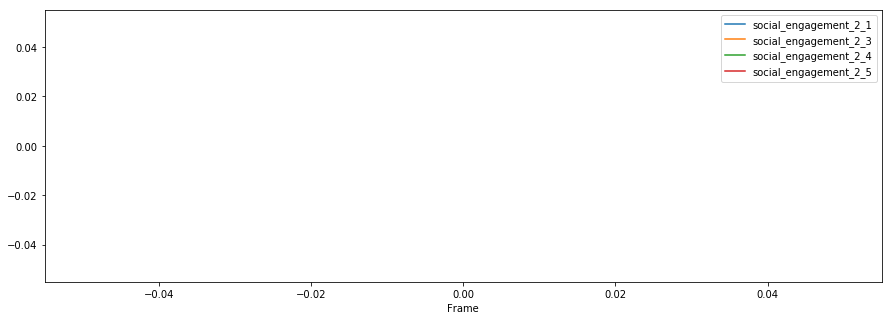

In [63]:
# grouped = soc_eng.groupby('GROUP')

# for name, group in grouped:
#     group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
#     group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


soc_eng.iloc[9000:10000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))    

In [77]:
eng_df = pd.DataFrame()  

eng_df['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].max(axis=1)
eng_df['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].max(axis=1, numeric_only=True)
eng_df['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].max(axis=1)
eng_df['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].max(axis=1)
eng_df['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].max(axis=1)
eng_df['GROUP'] = soc_eng["GROUP"]
eng_df = eng_df.reset_index() 
# eng_df = eng_df.drop('index', axis=1)

eng_df = eng_df.fillna(0)
eng_df
# print(soc_eng.describe())
# print(eng_df.describe())

,index,soc_average_1,soc_average_2,soc_average_3,soc_average_4,soc_average_5,GROUP
0,0,0.0,0.0,0.0,0.000000,0.0,study1
1,1,0.0,0.0,0.0,0.000000,0.0,study1
2,2,0.0,0.0,0.0,0.000000,0.0,study1
3,3,0.0,0.0,0.0,0.000000,0.0,study1
4,4,0.0,0.0,0.0,0.000000,0.0,study1
...,...,...,...,...,...,...,...
135664,135664,0.0,0.0,0.0,0.192618,0.0,study2
135665,135665,0.0,0.0,0.0,0.193515,0.0,study2
135666,135666,0.0,0.0,0.0,0.186498,0.0,study2
135667,135667,0.0,0.0,0.0,0.184275,0.0,study2


In [23]:
###smoothing, rolling window average
# eng_df = eng_df.rolling(window=30).mean() 

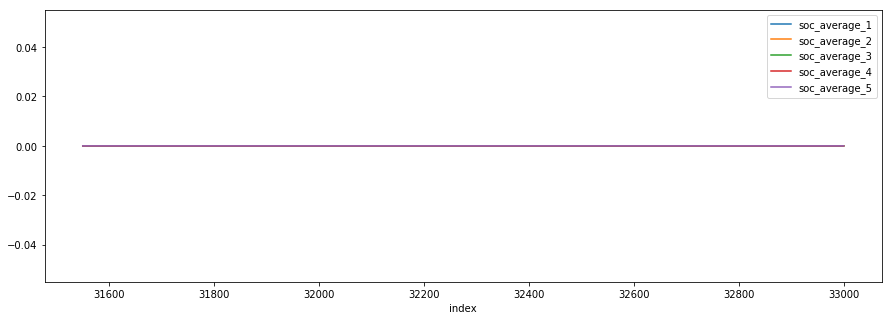

In [78]:
# grouped = eng_df.groupby('GROUP')

# for name, group in grouped:
#     group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(10,10))
    
    
# eng_df.iloc[40000:40200][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

eng_df.iloc[31550:33000][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

## Create Video

In [ ]:
#! python3

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import math
import numpy as np
import matplotlib.animation as animation

VICON_FPS = 100
VIDEO_FPS = 20

start = 601 * VIDEO_FPS
end =  800 * VIDEO_FPS  # 10sec video

#####################################################

csv_files = Path(".").glob("study6H.csv")
data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# convert df index to time periods
data_df.set_index(
    pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
)

# resample df to target FPS
data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


data_df['1RZ'] = data_df['1RZ'] - 90
# data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90



fov_angle = math.radians(60)

length = 500

fig, ax = plt.subplots(figsize=(10, 10))


def init():
    plt.legend(loc="upper left")

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)


def update(frame):

    print("Done %s%%" % (100 * (frame - start) / (end - start)))

    row = data_df.iloc[frame]

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw - fov_angle),
        600 * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw + fov_angle),
        600 * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    plt.legend(loc="upper left")
    plt.title(frame)
    
ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
writergif = animation.PillowWriter(fps=20)
ani.save('study6_4.gif',writer=writergif)


# ani.save("test.mp4", fps=VIDEO_FPS)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Done 0.0%
Done 0.02512562814070352%
Done 0.05025125628140704%
Done 0.07537688442211055%
Done 0.10050251256281408%
Done 0.12562814070351758%
Done 0.1507537688442211%
Done 0.17587939698492464%
Done 0.20100502512562815%
Done 0.22613065326633167%
Done 0.25125628140703515%
Done 0.27638190954773867%
Done 0.3015075376884422%
Done 0.32663316582914576%
Done 0.35175879396984927%
Done 0.3768844221105528%
Done 0.4020100502512563%
Done 0.4271356783919598%
Done 0.45226130653266333%
Done 0.47738693467336685%
Done 0.5025125628140703%
Done 0.5276381909547738%
Done 0.5527638190954773%
Done 0.5778894472361809%
Done 0.6030150753768844%
Done 0.628140703517588%
Done 0.6532663316582915%
Done 0.678391959798995%
Done 0.7035175879396985%
Done 0.7286432160804021%
Done 0.7537688442211056%
Done 0.7788944723618091%
Done 0.8040201005025126%
Done 0.8291457286432161%
Done 0.8542713567839196%
Done 0.8793969849246231%
Done 0.9045226130653267%
Done 0.9296482412060302%
Done 0.9547738693467337%
Done 0.9798994974874372%
Don

## Using human verified interaction starting points

In [50]:
from pathlib import Path


def load_and_process_group_file(file_path, group_name):
    print(file_path)
    elan_df = pd.read_csv(file_path, sep='\t').fillna(0)
    data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
    for item in data:
        item.insert(0, group_name)
    return data

# List of group files and their respective group names
group_files = [
    ("newannotations/group1H.txt", "1"),
    ("newannotations/group2D.txt", "2")
    # ("newannotations/group3E.txt", "3"),
    # ("newannotations/group4E.txt", "4"),
    # ("newannotations/group5P.txt", "5")
]

# Load and process each group file
data_list = [load_and_process_group_file(file_path, group_name) for file_path, group_name in group_files]

# Merge all data from different groups
merged_data = list(merge(*data_list))

# Create the final DataFrame
columns = ['GROUP', 'Participant', 'Frame', 'Interacted']
group_df = pd.DataFrame(merged_data, columns=columns)
group_df = group_df.sort_values('Participant')
group_df = group_df.reset_index()
group_df = group_df.drop('index', axis=1)

group_df

newannotations/group1H.txt
newannotations/group2D.txt


,GROUP,Participant,Frame,Interacted
0,1,1,1482,2 3 4 5
1,2,1,6490,2 3 4 5
2,2,1,6042,2 3 4 5
3,2,1,5750,2 3 4 5
4,2,1,3276,2 3 4 5
...,...,...,...,...
69,2,5,7646,1 2 3 4
70,1,5,2183,1 2 3 4
71,1,5,1211,1 2 3 4
72,1,5,9917,1 2 3 4


In [51]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df

,GROUP,Participant,Frame,Interacted
0,1,1,7409,2 3 4 5
1,2,1,32450,2 3 4 5
2,2,1,30210,2 3 4 5
3,2,1,28750,2 3 4 5
4,2,1,16380,2 3 4 5
...,...,...,...,...
69,2,5,38230,1 2 3 4
70,1,5,10915,1 2 3 4
71,1,5,6055,1 2 3 4
72,1,5,49585,1 2 3 4


In [52]:
for index, row in group_df.iterrows():
    range_frame = []
    frame = row['Frame']
    upp = (frame + 50)
    down = (frame - 50)
    for i in range(down, upp):
        range_frame.append(i)
    
# print(range_frame)
    val = group_df.isin({'Frame':(range_frame)})
print(val)



# for col in group_df:
# for frame in group_df['Frame']:
#     print(frame)


    GROUP  Participant  Frame  Interacted
0   False        False  False       False
1   False        False  False       False
2   False        False  False       False
3   False        False  False       False
4   False        False  False       False
..    ...          ...    ...         ...
69  False        False  False       False
70  False        False  False       False
71  False        False  False       False
72  False        False  False       False
73  False        False   True       False

[74 rows x 4 columns]


In [182]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist

,distance_1_2,distance_1_3,distance_1_4,distance_1_5,distance_2_1,distance_2_3,distance_2_4,distance_2_5,distance_3_1,distance_3_2,...,distance_4_2,distance_4_3,distance_4_5,distance_5_1,distance_5_2,distance_5_3,distance_5_4,Frame,GROUP,Frame2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304953,0.015651,NaN,NaN,0.337375,0.015651,0,study1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304760,0.015658,NaN,NaN,0.337144,0.015658,1,study1,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.304587,0.015660,NaN,NaN,0.336917,0.015660,2,study1,3
3,NaN,0.666053,0.490806,0.470107,NaN,NaN,NaN,NaN,0.666053,NaN,...,NaN,0.304407,0.015667,0.470107,NaN,0.336674,0.015667,3,study1,4
4,NaN,0.666010,0.490840,0.470117,NaN,NaN,NaN,NaN,0.666010,NaN,...,NaN,0.304197,0.015686,0.470117,NaN,0.336485,0.015686,4,study1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135664,0.324044,0.374583,0.088081,NaN,0.324044,0.032301,0.289354,NaN,0.374583,0.032301,...,0.289354,0.303902,NaN,NaN,NaN,NaN,NaN,135664,study2,76351
135665,0.324168,0.374839,0.088083,NaN,0.324168,0.032454,0.289494,NaN,0.374839,0.032454,...,0.289494,0.304161,NaN,NaN,NaN,NaN,NaN,135665,study2,76352
135666,0.324120,0.375062,0.088066,NaN,0.324120,0.032767,0.289455,NaN,0.375062,0.032767,...,0.289455,0.304402,NaN,NaN,NaN,NaN,NaN,135666,study2,76353
135667,0.324202,0.374805,0.088108,NaN,0.324202,0.032392,0.289510,NaN,0.374805,0.032392,...,0.289510,0.304106,NaN,NaN,NaN,NaN,NaN,135667,study2,76354


In [113]:
eng_df

,index,soc_average_1,soc_average_2,soc_average_3,soc_average_4,soc_average_5,GROUP
0,0,0.0,0.0,0.0,0.000000,0.0,study1
1,1,0.0,0.0,0.0,0.000000,0.0,study1
2,2,0.0,0.0,0.0,0.000000,0.0,study1
3,3,0.0,0.0,0.0,0.000000,0.0,study1
4,4,0.0,0.0,0.0,0.000000,0.0,study1
...,...,...,...,...,...,...,...
135664,135664,0.0,0.0,0.0,0.192618,0.0,study2
135665,135665,0.0,0.0,0.0,0.193515,0.0,study2
135666,135666,0.0,0.0,0.0,0.186498,0.0,study2
135667,135667,0.0,0.0,0.0,0.184275,0.0,study2


### Interaction Profiles

In [239]:
def calculate_social_engagement(df_dist, eng_df, window_size, int_df, temp_df, opp_df):
    grp = eng_df.groupby(by=["GROUP"])

    for group, data in grp:
        df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
        group_dff = group_df.loc[group_df['GROUP'] == group[-1]]
        group_frames = group_dff['Frame']
        df_filtered = df_dist_g[df_dist_g['Frame2'].isin(group_frames)]
        
        soc_engg = soc_eng.loc[soc_eng['GROUP'] == group]


        for index, row in df_filtered.iterrows():
            last_index = -window_size
            count = 0   
            selector = index

            g_row = group_dff[group_dff['Frame'] == row['Frame2']]
            g_par = g_row['Participant'].values[0]
            g_int = g_row['Interacted'].values[0].rstrip()

            if len(g_int) < 2:
                if selector and index >= (last_index + window_size):
                    last_index = index
                    count += 1

                    for window_offset in range(-window_size, window_size):
                        frame_idx = row["Frame2"] + window_offset
                        frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                        if g_par != g_int:
                            nem = f'social_engagement_{g_par}_{g_int}'
                            int_pps = frames[f'social_engagement_{g_par}_{g_int}'].values[0]

                            opp_nem = f'social_engagement_{g_int}_{g_par}'
                            opp_pps = frames[f'social_engagement_{g_int}_{g_par}'].values[0]

                            for _, roww in frames.iterrows():
                                ro = pd.Series([g_par, window_offset, int_pps, nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                temp_df = pd.concat([temp_df, ro.to_frame().T])

                                opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                opp_df = pd.concat([opp_df, opp_ro.to_frame().T])

            else:
                res = g_int.split() 
                for par in res:
                    if selector and index >= (last_index + window_size):
                        last_index = index
                        count += 1

                        for window_offset in range(-window_size, window_size):
                            frame_idx = row["Frame2"] + window_offset
                            frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                            if g_par != par:
                                nem = f'social_engagement_{g_par}_{par}'
                                int_pps = frames[f'social_engagement_{g_par}_{par}'].values[0]

                                opp_nem = f'social_engagement_{par}_{g_par}'
                                opp_pps = frames[f'social_engagement_{par}_{g_par}'].values[0]

                                for _, roww in frames.iterrows():
                                    ro = pd.Series([g_par, window_offset, int_pps, nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                    temp_df = pd.concat([temp_df, ro.to_frame().T])

                                    opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                    opp_df = pd.concat([opp_df, opp_ro.to_frame().T])
    return temp_df, opp_df

# Create empty DataFrames
temp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
opp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])


# Define the window size
WINDOW_SIZE = 50

# Call the function
int_df, opp_df = calculate_social_engagement(df_dist, eng_df, WINDOW_SIZE, int_df, temp_df, opp_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)

opp_df = opp_df.reset_index()
opp_df = opp_df.drop('index', axis=1)

int_df

,ID,Frame,social_engagement,soc_eng_with,GROUP
0,5,-50,NaN,social_engagement_5_1,study1
1,5,-49,NaN,social_engagement_5_1,study1
2,5,-48,NaN,social_engagement_5_1,study1
3,5,-47,NaN,social_engagement_5_1,study1
4,5,-46,NaN,social_engagement_5_1,study1
...,...,...,...,...,...
7295,2,45,0,social_engagement_2_1,study2
7296,2,46,0,social_engagement_2_1,study2
7297,2,47,0,social_engagement_2_1,study2
7298,2,48,0,social_engagement_2_1,study2


In [240]:
opp_df

,ID,Frame,social_engagement,soc_eng_with,GROUP
0,5,-50,NaN,social_engagement_1_5,study1
1,5,-49,NaN,social_engagement_1_5,study1
2,5,-48,NaN,social_engagement_1_5,study1
3,5,-47,NaN,social_engagement_1_5,study1
4,5,-46,NaN,social_engagement_1_5,study1
...,...,...,...,...,...
7295,2,45,0,social_engagement_1_2,study2
7296,2,46,0,social_engagement_1_2,study2
7297,2,47,0,social_engagement_1_2,study2
7298,2,48,0,social_engagement_1_2,study2


In [270]:
int_df = pd.concat([int_df, opp_df])
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
int_df

,ID,Frame,social_engagement,soc_eng_with,GROUP,index1
0,5,-50,0,social_engagement_5_1,study1,0.0
1,5,-49,0,social_engagement_5_1,study1,1.0
2,5,-48,0,social_engagement_5_1,study1,2.0
3,5,-47,0,social_engagement_5_1,study1,3.0
4,5,-46,0,social_engagement_5_1,study1,4.0
...,...,...,...,...,...,...
21895,2,45,0,social_engagement_1_2,study2,NaN
21896,2,46,0,social_engagement_1_2,study2,NaN
21897,2,47,0,social_engagement_1_2,study2,NaN
21898,2,48,0,social_engagement_1_2,study2,NaN


In [242]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
# int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])

int_df

,ID,Frame,social_engagement,soc_eng_with,GROUP
0,5,-50,NaN,social_engagement_5_1,study1
1,5,-49,NaN,social_engagement_5_1,study1
2,5,-48,NaN,social_engagement_5_1,study1
3,5,-47,NaN,social_engagement_5_1,study1
4,5,-46,NaN,social_engagement_5_1,study1
...,...,...,...,...,...
14595,2,45,0.0,social_engagement_1_2,study2
14596,2,46,0.0,social_engagement_1_2,study2
14597,2,47,0.0,social_engagement_1_2,study2
14598,2,48,0.0,social_engagement_1_2,study2


In [243]:
interaction_profiles = int_df.groupby(['ID', 'Frame']).agg({'social_engagement':['mean','std']})
                                      
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
interaction_profiles

,ID,Frame,social_engagement_mean,social_engagement_std
0,1,-50,0.423539,0.486491
1,1,-49,0.422198,0.487104
2,1,-48,0.421877,0.487978
3,1,-47,0.420680,0.488352
4,1,-46,0.419758,0.488693
...,...,...,...,...
495,5,45,0.399556,0.515827
496,5,46,0.399699,0.516010
497,5,47,0.399697,0.516007
498,5,48,0.399117,0.515263


In [244]:
int_df[int_df["Frame"] ==0].groupby('ID').count()

,Frame,social_engagement,soc_eng_with,GROUP
ID,,,,
1,32,14,32,32
2,30,12,30,30
3,28,14,28,28
4,32,16,32,32
5,24,10,24,24


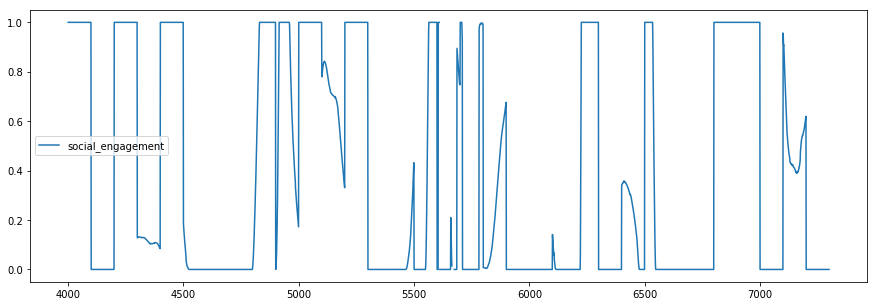

In [245]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.lineplot(data=int_df, y="social_engagement",x="Frame",hue="ID",ci=None, palette="flare")

# plt.plot(data=int_df, ax=ax, kind='line', x='Frame', y='social_engagement')

int_df.iloc[0:10000][["social_engagement"]].plot(kind="line", figsize=(15,5))


# Clustering

In [246]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Visualise Data Distribution

(array([3145.,  192.,   82.,  244.,  224.,  139.,   97.,   91.,   80.,
        2286.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

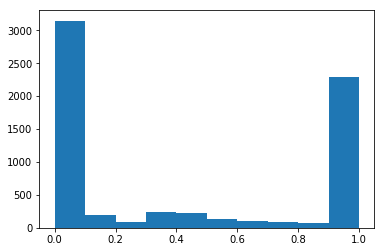

In [247]:
plt.hist(int_df['social_engagement'])

### ___________________________________________________________________

## ________________________________________

In [248]:
int_df['index1'] = int_df.index
new = int_df[['Frame', 'social_engagement']]
new.set_index('Frame', inplace=True)
new = new.T
new

Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,40,41,42,43,44,45,46,47,48,49
social_engagement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
int_df = int_df.fillna(0)
# int_df = int_df.replace(to_replace=" NULL",value=0)
int_df.isnull().any()
int_df.isnull().sum().sum()

# int_df

0

In [261]:
columns_per_row = 100
num_columns = len(new.columns) 

# Calculate the number of resulting rows
num_result_rows = num_columns // columns_per_row + (1 if num_columns % columns_per_row != 0 else 0)
# Initialize an empty DataFrame to store the result
result_list = []

# Loop through the range of rows
for i in range(num_result_rows):
    # Calculate the start and end indices for the current subset of columns
    start_index = i * columns_per_row
    end_index = min((i + 1) * columns_per_row, num_columns)

    ID = int_df['ID'].loc[start_index]
    INDEX = int_df['index1'].loc[start_index]
    GROUP = int_df['GROUP'].loc[start_index]

    subset_df = new.iloc[:, start_index:end_index].copy()
    subset_df['ID'] = ID
    subset_df['OGINDEX'] = INDEX + 50
    subset_df['GROUP'] = GROUP
    # print(subset_df)
    result_list.append(subset_df)    

result_df = pd.DataFrame()
print (subset_df.columns[subset_df.columns.duplicated(keep=False)])
result_df = pd.concat(result_list)
result_df.reset_index(drop=True, inplace=True)
result_df['ID'] = result_df['ID'].astype(int)

result_df

Index([], dtype='object', name='Frame')


Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,43,44,45,46,47,48,49,ID,OGINDEX,GROUP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,50,study1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,150,study1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,250,study1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,350,study1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,450,study1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.514990e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,14150,study2
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5,14250,study2
143,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.265140e-01,0.624113,0.619818,0.61311,0.612436,0.647994,0.637948,4,14350,study2
144,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3,14450,study2


## ______________________________________________________________

In [262]:
select_df = result_df.drop(['ID', 'OGINDEX'], axis=1)
select_df = select_df.fillna(0)
select_df = select_df.replace(to_replace=" NULL",value=0)
select_df

Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,41,42,43,44,45,46,47,48,49,GROUP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000319,0.000274,8.514990e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study2
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,study2
143,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.630001,0.630175,6.265140e-01,0.624113,0.619818,0.61311,0.612436,0.647994,0.637948,study2
144,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,study2


In [263]:
s = select_df.std(axis=1)
select_df['std'] = s
select_df['ID'] = result_df['ID'].values
select_df['OGINDEX'] = result_df['OGINDEX'].values

std_df = select_df
std_df = std_df.loc[std_df['std'] != 0.000000]
std_df = std_df.loc[std_df['std'] > 0.090499]
std_df = std_df.reset_index()
stdd_df = std_df
std_df

Frame,index,-50,-49,-48,-47,-46,-45,-44,-43,-42,...,44,45,46,47,48,49,GROUP,std,ID,OGINDEX
0,48,0.009861,0.020427,0.034851,0.051899,0.072435,0.095267,0.119927,0.147453,0.176070,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,study2,0.311476,4,4850
1,49,0.000000,0.004260,0.017445,0.041180,0.073090,0.113377,0.164304,0.226249,0.295262,...,0.224508,0.213676,0.202801,0.191831,0.182650,0.172154,study2,0.342143,4,4950
2,51,0.779957,0.789351,0.798628,0.807119,0.814932,0.822131,0.828406,0.833418,0.837426,...,0.378812,0.368827,0.358809,0.349356,0.340053,0.330742,study2,0.142227,4,5150
3,54,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.307948,0.337007,0.359482,0.384512,0.410771,0.431897,study2,0.104182,1,5450
4,55,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,study2,0.474792,4,5550
5,56,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.791901,0.779265,0.763181,0.751472,0.749512,0.747146,study2,0.340755,3,5650
6,57,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997735,0.964681,...,0.994002,0.995565,0.996993,0.996965,0.991165,0.989629,study2,0.447229,5,5750
7,58,0.007130,0.007595,0.007693,0.007229,0.007030,0.006544,0.006296,0.005854,0.005434,...,0.641212,0.649410,0.657468,0.665055,0.670729,0.676102,study2,0.236659,2,5850
8,62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,study2,0.417443,1,6250
9,64,0.340406,0.343408,0.344621,0.347074,0.350064,0.351805,0.352092,0.351065,0.352714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,study2,0.142228,5,6450


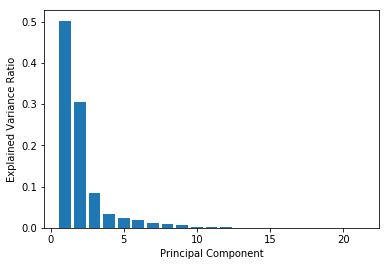

Original DataFrame:
Frame       -50       -49       -48       -47       -46       -45       -44  \
0      0.009861  0.020427  0.034851  0.051899  0.072435  0.095267  0.119927   
1      0.000000  0.004260  0.017445  0.041180  0.073090  0.113377  0.164304   
2      0.779957  0.789351  0.798628  0.807119  0.814932  0.822131  0.828406   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5      0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
6      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7      0.007130  0.007595  0.007693  0.007229  0.007030  0.006544  0.006296   
8      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9      0.340406  0.343408  0.344621  0.347074  0.350064  0.351805  0.352092   
10     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
11     0.956958  0.932125  0.906

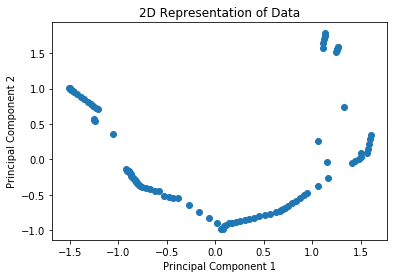

In [264]:
std_df = std_df.rename(str,axis="columns")
std_df = std_df.drop('std', axis=1)
std_df = std_df.drop('index', axis=1)
std_df = std_df.drop('ID', axis=1)
std_df = std_df.drop('OGINDEX', axis=1)
std_df = std_df.drop('GROUP', axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(std_df)

# Perform PCA
pca = PCA()
#pca_result = pca.fit_transform(scaled_data)

pca_result = pca.fit_transform(std_df.T)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 5
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(std_df.T)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)



# Display the results
print("Original DataFrame:")
print(std_df)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()

In [266]:
pca_result.T
pca_result = (pca_result-pca_result.min())/(pca_result.max()-pca_result.min())
# df_norm

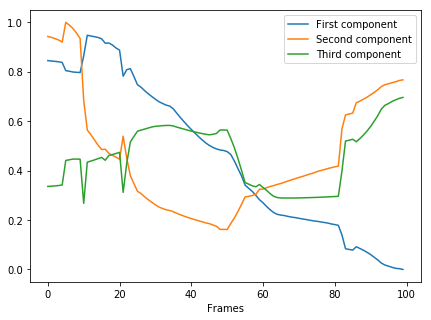

In [267]:
fig, ax = plt.subplots(figsize=(7, 5))

line1, = ax.plot(pca_result.T[0])
line2, = ax.plot(pca_result.T[1])
line3, = ax.plot(pca_result.T[2])

plt.xlabel('Frames')
plt.ylabel('')
# plt.xlim(-50, 50)

ax.legend([line1, line2, line3], ['First component', 'Second component', 'Third component'])

,0,1,2,3,4
0,31.373025,33.347734,38.935029,37.910074,37.882277
1,35.250363,24.603195,31.977588,31.733149,31.584959
2,34.793242,30.166006,30.357544,31.008803,30.801466
3,0.278663,3.472696,2.962280,2.157755,2.393195
4,6.199914,21.398540,17.867874,18.349075,19.215428
5,4.630111,13.319221,9.456426,8.427285,7.037172
6,9.037410,21.955427,14.448729,13.277784,12.799765
7,5.011868,12.841973,11.984127,11.755322,12.100110
8,25.713801,29.696519,36.239090,35.320501,34.745879
9,13.285367,8.702125,9.281650,9.326854,9.097492


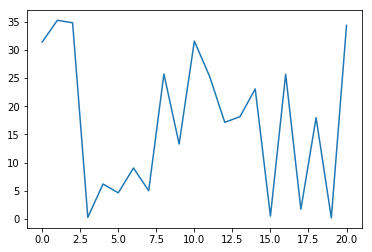

In [268]:
std_df.dot(pca_result)[0].plot()
projected_interactions = std_df.dot(pca_result) 
#the spikes: how they've responded to the PCA

projected_interactions_df = pd.DataFrame(projected_interactions)
projected_interactions_df

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6]
For n_clusters = 2, silhouette score is 0.5571934666458522)
For n_clusters = 3, silhouette score is 0.4161609756127694)
For n_clusters = 4, silhouette score is 0.44634527777457567)
For n_clusters = 5, silhouette score is 0.44512601826837134)
For n_clusters = 6, silhouette score is 0.4401884529499168)


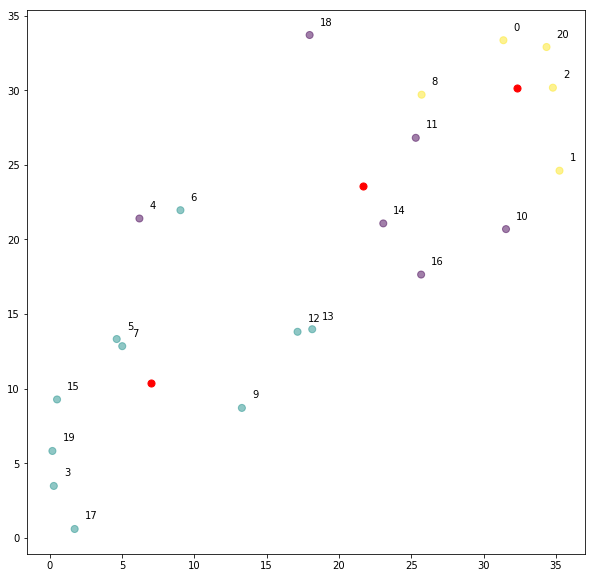

In [269]:
# Convert DataFrame to matrix
X = projected_interactions_df[[0, 1, 2, 3, 4]]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
projected_interactions_df['Cluster'] = kmeans.labels_

##Optimum k
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(2,7))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
           
##############

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X[0], X[1], c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')

#label as ID
for i, txt in enumerate(range(len(projected_interactions_df))):
    plt.annotate(txt, (X.iloc[i,0], X.iloc[i,1]), xytext=(10,10), textcoords='offset points')
    
# plt.legend()
plt.show()

<AxesSubplot:xlabel='Frame'>

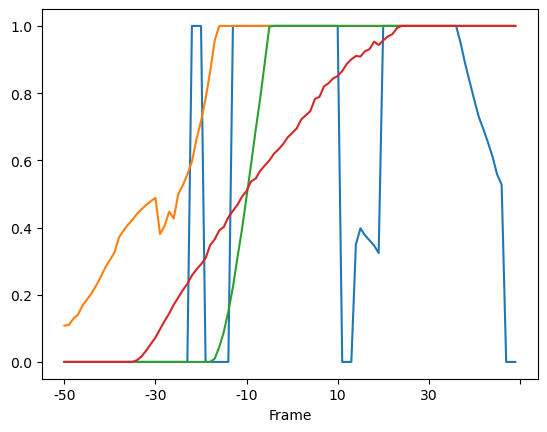

In [276]:
std_df.iloc[6].plot()
std_df.iloc[23].plot()
std_df.iloc[28].plot()
std_df.iloc[50].plot()

In [732]:
#get avg/std of cluster

In [277]:
std_df['Cluster'] = projected_interactions_df['Cluster']
std_df['ID'] = stdd_df['ID']
std_df['OGINDEX'] = stdd_df['OGINDEX']
std_df['index'] = stdd_df['index']
std_df['std'] = stdd_df['std']
std_df

Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,45,46,47,48,49,Cluster,ID,OGINDEX,index,std
0,0.354418,0.346744,0.346525,0.347150,0.348531,0.351058,0.353051,0.352289,0.349678,0.352459,...,1.000000,1.000000,1.000000,1.000000,1.00000,0,1,550,5,0.285965
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0,3,1550,15,0.381497
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1,3,2150,21,0.391355
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,2,2,2350,23,0.114706
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,2,2,2450,24,0.114706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,2,5,22750,227,0.327998
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.556482,0.528162,0.514900,0.514475,...,0.000000,0.000000,0.000000,0.000000,0.00000,2,2,22850,228,0.119873
64,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,2,3,23050,230,0.431601
65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.426547,0.511571,0.562678,0.607464,0.69589,2,5,23450,234,0.132782


In [278]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(groups[['OGINDEX','Cluster', 'ID', 'std', 'index']])  

Frame  OGINDEX  Cluster  ID       std  index
0          550        0   1  0.285965      5
1         1550        0   3  0.381497     15
6         3450        0   1  0.467934     34
17        7050        0   2  0.481407     70
20        7450        0   2  0.412089     74
23        8250        0   5  0.303085     82
27        9450        0   2  0.286943     94
28        9550        0   4  0.473592     95
29       10150        0   4  0.377525    101
34       11150        0   3  0.467468    111
35       13250        0   2  0.322392    132
39       15550        0   3  0.489207    155
41       15950        0   5  0.389512    159
42       16250        0   5  0.404685    162
50       18850        0   2  0.393514    188
58       21650        0   3  0.455685    216
Frame  OGINDEX  Cluster  ID       std  index
2         2150        1   3  0.391355     21
9         3950        1   1  0.463408     39
16        6950        1   2  0.354717     69
22        8150        1   3  0.422953     81
24        

Frame
-50    0.053550
-49    0.053822
-48    0.039476
-47    0.040553
-46    0.043114
         ...   
45     0.955267
46     0.957196
47     0.920797
48     0.924281
49     0.924568
Length: 100, dtype: float64
Frame
-50    0.903156
-49    0.912733
-48    0.932313
-47    0.950351
-46    0.965642
         ...   
45     0.012349
46     0.011348
47     0.013449
48     0.014914
49     0.016373
Length: 100, dtype: float64
Frame
-50    0.323746
-49    0.317701
-48    0.264545
-47    0.262675
-46    0.312738
         ...   
45     0.361429
46     0.366645
47     0.372359
48     0.365752
49     0.370697
Length: 100, dtype: float64


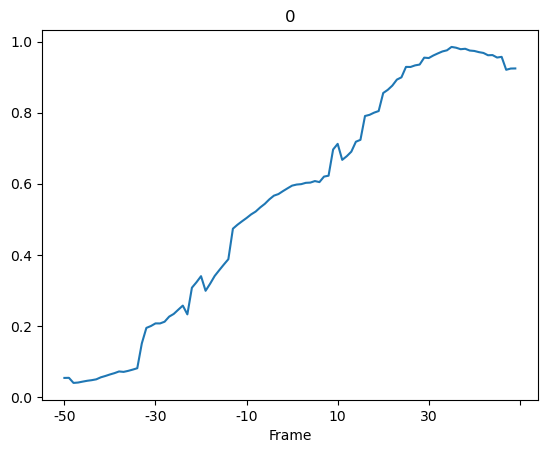

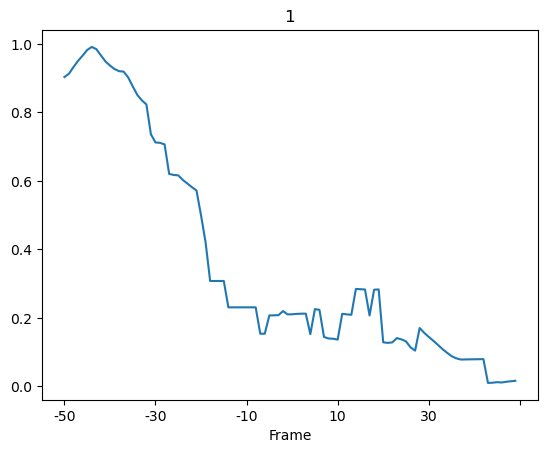

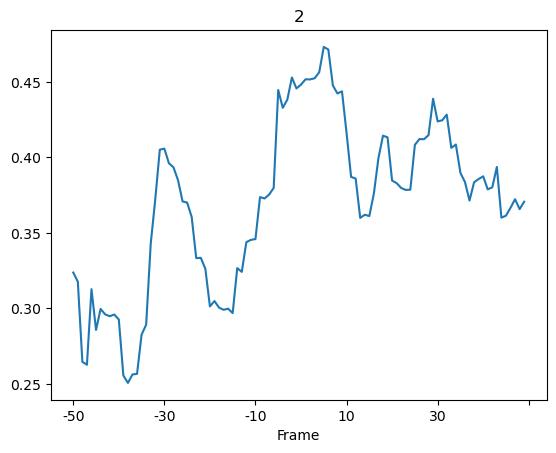

In [279]:
#plotting cluster 
grp = std_df.groupby(by=["Cluster"])

for name, data in grp:
    data = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index'], axis=1)
    avg = data.mean(axis=0)
    fig, ax = plt.subplots()
    ax.set_title(name)
    print(avg)
    ax= avg.plot(label=name)    
    

In [300]:
# #plotting cluster 
# grp = std_df.groupby(by=["Cluster"])

# for name, data in grp:
#     dataa = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index'], axis=1)
#     avg = dataa.mean(axis=0)
# #     sns.set(rc={"figure.figsize":(8, 8)}) #width=8, height=4
#     sns.relplot(data=avg,height=5, aspect=2, err_style="std_bars")

In [302]:
# #plotting cluster std
# grp = std_df.groupby(by=["Cluster"])
# fig, ax = plt.subplots()

# for name, data in grp:
#     std_list = []
#     avg_list = []
#     data = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index'], axis=1)
#     for i in data:
#         std = data[i].std()
#         std_list.append(std)
#         avg = data[i].mean()
#         avg_list.append(avg)
        

#     plt.errorbar(avg_list,i)
#     plt.show()

#     print("=====================")
# #     std = data['std']
# #     data = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index'], axis=1)
# #     avg = data.mean(axis=0)
# #     fig, ax = plt.subplots()
# #     ax.set_title(name)
# # #     print(std)
# #     ax.errorbar(avg.index, avg, label=name, xerr=std)    
    

In [303]:
std_df
data_df
full_df = pd.merge(std_df, data_df, left_on='OGINDEX', right_on='Frame', how='inner')
full_df['3TX']

0     -630.628235
1     -685.827332
2     -615.491638
3     -670.107361
4     -648.105591
         ...     
62     932.802002
63     907.536743
64            NaN
65     954.269104
66    1003.728516
Name: 3TX, Length: 67, dtype: float64

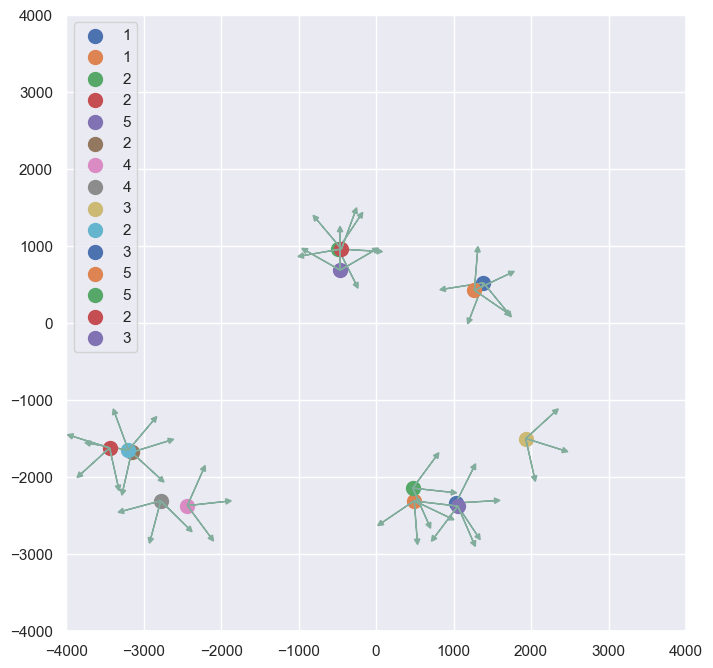

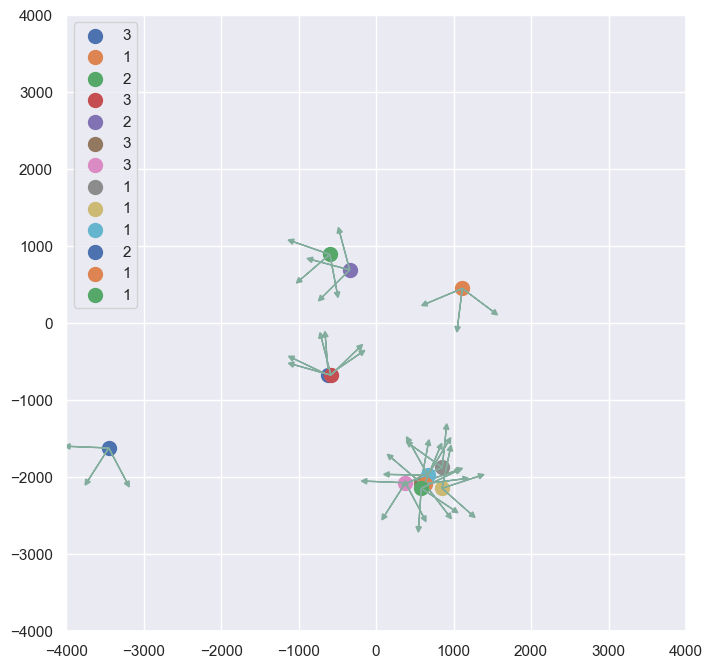

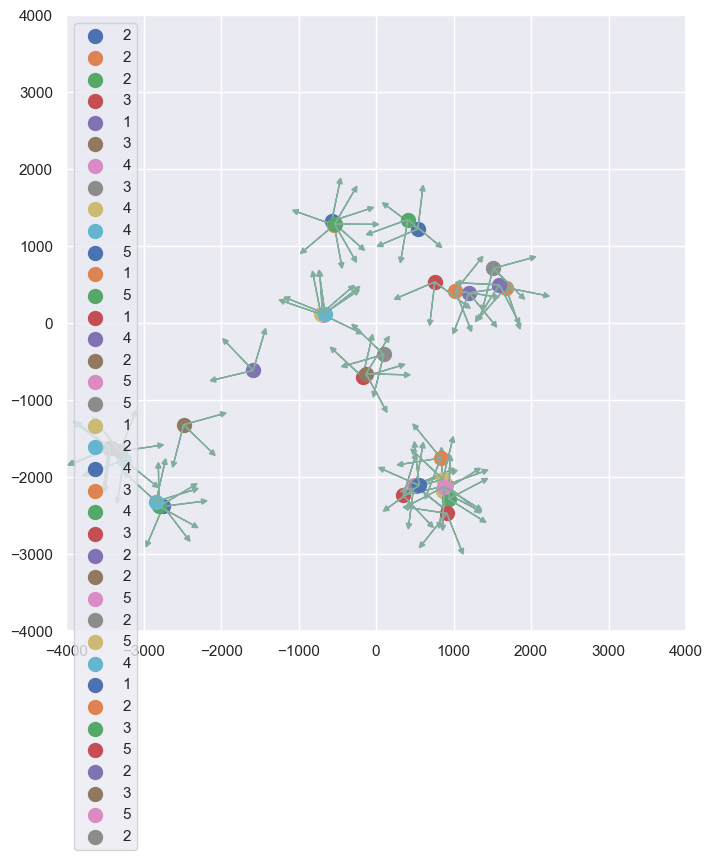

In [451]:
grp = full_df.groupby(by=["Cluster"])

for name, data in grp:
    for i, row in data.iterrows():
        if i == ID:
            continue
        else:
            ID = int(row["ID"])
            x = row['{}TX'.format(ID)]
            y = row['{}TY'.format(ID)]
            yaw = row['{}TZ'.format(ID)]
    
        plt.scatter(x, y, s=100, label=ID)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        
    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()


In [305]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in std_df.iterrows():
    frame = row['OGINDEX']
    frame = (int(frame)/VICON_FPS)*VIDEO_FPS
    std_df.at[index,'Framez'] = int(frame)

std_df

Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,46,47,48,49,Cluster,ID,OGINDEX,index,std,Framez
0,0.354418,0.346744,0.346525,0.347150,0.348531,0.351058,0.353051,0.352289,0.349678,0.352459,...,1.000000,1.000000,1.000000,1.00000,0,1,550,5,0.285965,110.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,0,3,1550,15,0.381497,310.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,1,3,2150,21,0.391355,430.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,2,2,2350,23,0.114706,470.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,2,2,2450,24,0.114706,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,2,5,22750,227,0.327998,4550.0
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.556482,0.528162,0.514900,0.514475,...,0.000000,0.000000,0.000000,0.00000,2,2,22850,228,0.119873,4570.0
64,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,2,3,23050,230,0.431601,4610.0
65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.511571,0.562678,0.607464,0.69589,2,5,23450,234,0.132782,4690.0


In [306]:
projected_interactions_df
# projected_interactions_df = projected_interactions_df.rename_axis('Frame', axis=1)
projected_interactions_df.rename(columns={0:'Zero'}, inplace=True)
projected_interactions_df.rename(columns={1:'One'}, inplace=True)
projected_interactions_df.rename(columns={2:'Two'}, inplace=True)
projected_interactions_df.rename(columns={3:'Three'}, inplace=True)
projected_interactions_df.rename(columns={4:'Four'}, inplace=True)
projected_interactions_df

,Zero,One,Two,Three,Four,Cluster
0,-45.427040,-12.975854,-4.319105,2.897359,0.126260,0
1,-42.968986,-27.197310,12.544586,-4.515748,-2.035433,0
2,41.004768,26.808321,-14.577596,5.719235,1.796028,1
3,-10.653893,-3.337958,-4.571221,3.205816,0.666952,2
4,-6.452743,4.990740,-5.515911,0.266103,1.363613,2
...,...,...,...,...,...,...
62,-25.136331,-16.047401,7.944219,-3.567343,4.217893,2
63,12.995601,-1.585439,0.366779,0.212774,-0.125778,2
64,-25.226513,-11.463605,6.795954,-3.528531,12.730651,2
65,-8.070066,-5.592891,3.557723,-1.130264,-2.758036,2


In [307]:
projected_interactions_df
projected_interactions_df = projected_interactions_df.drop('Cluster', axis=1)
std_df
clus_df = pd.concat([std_df, projected_interactions_df], axis=1)
print(clus_df.columns.tolist())

['-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 'Cluster', 'ID', 'OGINDEX', 'index', 'std', 'Framez', 'Zero', 'One', 'Two', 'Three', 'Four']


Cluster
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Zero, dtype: object

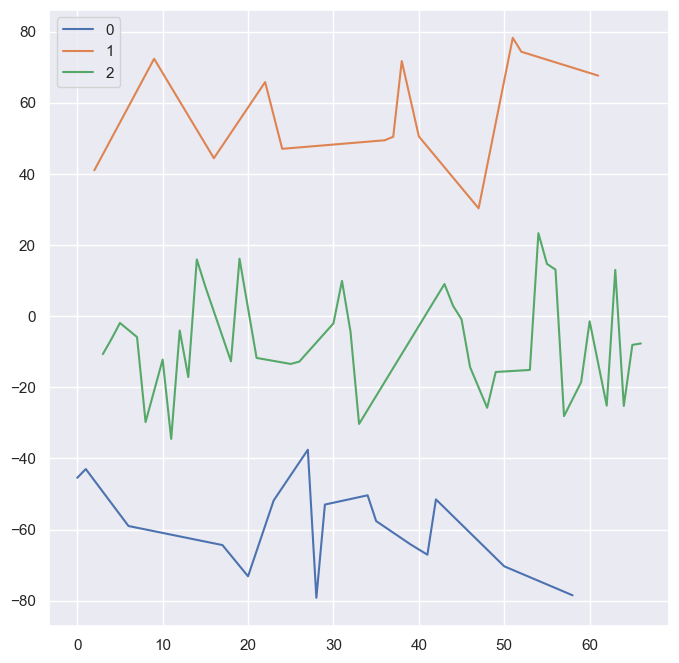

In [308]:
clus_df.groupby('Cluster')['Zero'].plot(legend=True)
# clus_df.groupby('Cluster')['One'].plot(legend=True)
# clus_df.groupby('Cluster')['Two'].plot(legend=True)
# clus_df.groupby('Cluster')['Three'].plot(legend=True)
# clus_df.groupby('Cluster')['Four'].plot(legend=True)

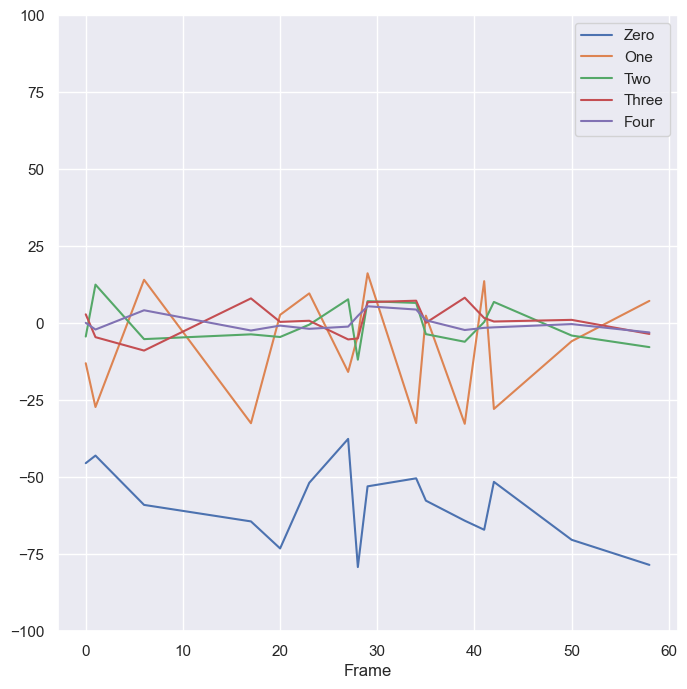

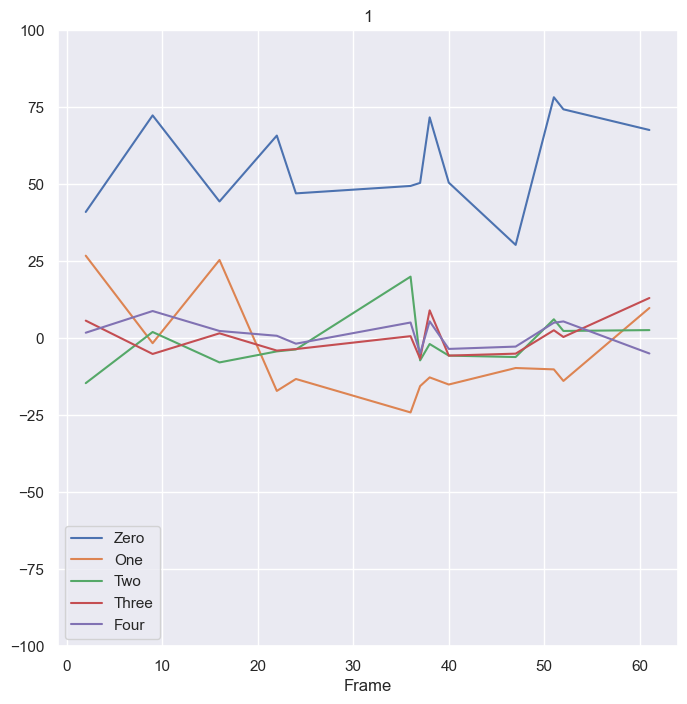

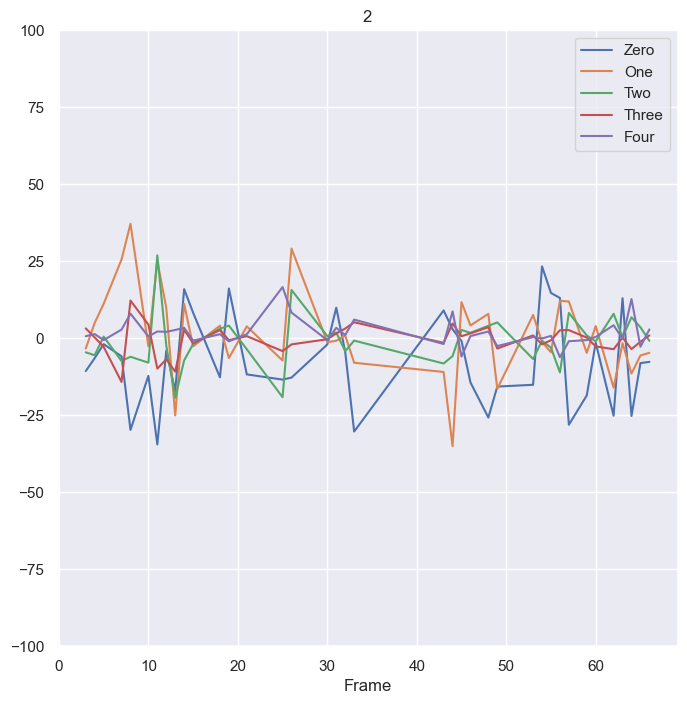

In [428]:
grp = clus_df.groupby(by=["Cluster"])

for name, data in grp:
    ax= data[['Zero','One', 'Two', 'Three', 'Four']].plot(title=name, ylim=(-100,100))  
    plt.xlabel('Frame')
    

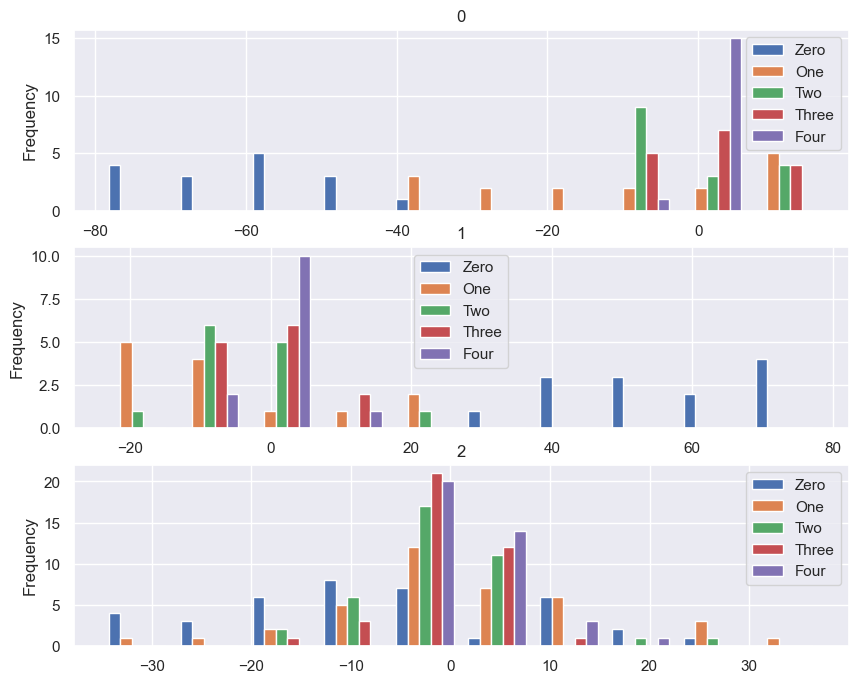

In [310]:
ax = clus_df.plot.hist(column=["Zero", "One", "Two", "Three", "Four"], by="Cluster", figsize=(10, 8))

In [363]:
#is participant always in same cluster?
grp = std_df.groupby(by=["Cluster"])

for name, data in grp:
    print("Cluster " , name)
    count = data['ID'].value_counts()
    print(count)


Cluster  0
2    5
3    4
5    3
1    2
4    2
Name: ID, dtype: int64
Cluster  1
1    6
3    4
2    3
Name: ID, dtype: int64
Cluster  2
2    11
5     8
3     7
4     7
1     5
Name: ID, dtype: int64


# Correlations between social engagement profiles and personality

In [379]:
file = Path("big5.csv")
big5_df = pd.read_csv(file)

C:\Users\n23-webb\AppData\Local\Temp\ipykernel_3596\703439900.py:92: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

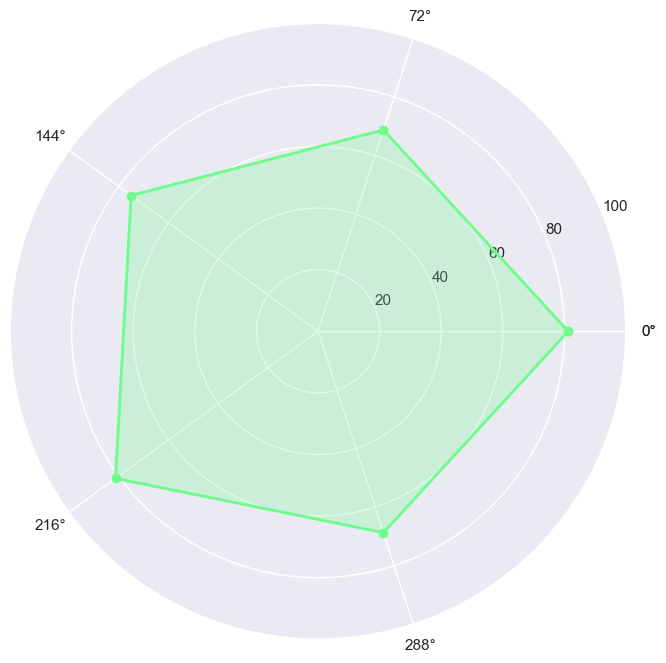

In [380]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age


emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [385]:
group4 = dfbig5[dfbig5['group'] == 4]
  
# interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby("ID")["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")

group4

,emotional_stability,extraversion,agreeableness,conscientiousness,intellect,helmet,group,age
15,81.25,75.00,75.00,68.75,81.25,1,4,53
16,93.75,75.00,75.00,68.75,81.25,2,4,34
17,75.00,75.00,75.00,87.50,68.75,3,4,59
18,68.75,81.25,87.50,68.75,68.75,4,4,38
19,62.50,81.25,93.75,81.25,56.25,5,4,34


In [386]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_after_mean = soceng_after_mean.set_index("ID")
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_before_mean = soceng_before_mean.set_index("ID")
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles_after

,ID,Frame,social_engagement_mean,social_engagement_std
51,1,1,0.366276,0.466065
52,1,2,0.366815,0.465954
53,1,3,0.367845,0.464783
54,1,4,0.356873,0.465629
55,1,5,0.387555,0.470338
...,...,...,...,...
495,5,45,0.398864,0.469354
496,5,46,0.401648,0.469587
497,5,47,0.403974,0.469716
498,5,48,0.405558,0.470211


In [390]:
group4 = dfbig5[dfbig5['group'] == 4]
group4 = group4.sort_values(by=['helmet'], ascending=True)
group4.index = np.arange(1, len(group4) + 1)


big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr.index = np.arange(1, len(df_corr) + 1)

print(group4)
full_corr = pd.merge(group4, df_corr, left_index=True, right_index=True)
full_corr


   emotional_stability  extraversion  agreeableness  conscientiousness  \
1                81.25         75.00          75.00              68.75   
2                93.75         75.00          75.00              68.75   
3                75.00         75.00          75.00              87.50   
4                68.75         81.25          87.50              68.75   
5                62.50         81.25          93.75              81.25   

   intellect  helmet  group  age  
1      81.25       1      4   53  
2      81.25       2      4   34  
3      68.75       3      4   59  
4      68.75       4      4   38  
5      56.25       5      4   34  


,emotional_stability,extraversion,agreeableness,conscientiousness,intellect,helmet,group,age,ID,social_engagement_mean,ID,social_engagement_std,ID,social_engagement_after,ID,social_engagement_before,ID,social_engagement_delta
1,81.25,75.00,75.00,68.75,81.25,1,4,53,1,0.372745,1,0.473168,1,0.359571,1,0.385779,1,-0.026208
2,93.75,75.00,75.00,68.75,81.25,2,4,34,2,0.438348,2,0.473716,2,0.457912,2,0.419220,2,0.038692
3,75.00,75.00,75.00,87.50,68.75,3,4,59,3,0.441393,3,0.493208,3,0.458443,3,0.424925,3,0.033518
4,68.75,81.25,87.50,68.75,68.75,4,4,38,4,0.488021,4,0.499797,4,0.504023,4,0.471519,4,0.032504
5,62.50,81.25,93.75,81.25,56.25,5,4,34,5,0.361428,5,0.463190,5,0.384492,5,0.338881,5,0.045611


(array([[1., 1., 1., 1., 1.],
        [0., 0., 3., 2., 0.],
        [0., 0., 3., 0., 2.],
        [0., 3., 0., 1., 1.],
        [1., 2., 0., 2., 0.]]),
 array([56.25, 63.75, 71.25, 78.75, 86.25, 93.75]),
 <a list of 5 BarContainer objects>)

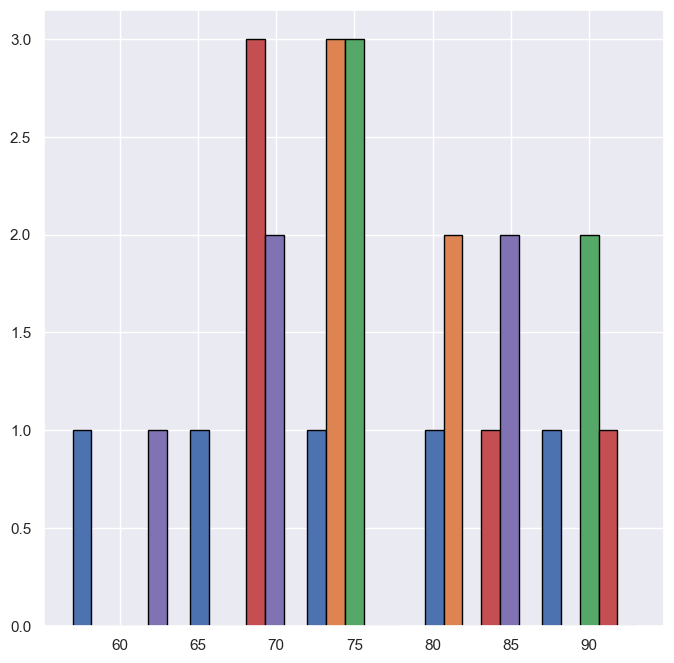

In [391]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

In [392]:
std_df

corr_df = std_df.groupby(['ID'])['std'].mean().reset_index()
corr_df

,ID,std
0,1,0.344639
1,2,0.260198
2,3,0.356901
3,4,0.364366
4,5,0.207428


In [393]:
for cat in big5+ ["age"]:
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], corr_df["std"])))
    print()

soceng_std <-> emotional_stability: (r, p): PearsonRResult(statistic=0.0735354180652287, pvalue=0.9064562481141933) 

soceng_std <-> extraversion: (r, p): PearsonRResult(statistic=-0.273459024325129, pvalue=0.6562106409283652) 

soceng_std <-> agreeableness: (r, p): PearsonRResult(statistic=-0.4644624141913726, pvalue=0.4306377921212123) 

soceng_std <-> conscientiousness: (r, p): PearsonRResult(statistic=-0.12207795481886405, pvalue=0.8449524621046169) 

soceng_std <-> intellect: (r, p): PearsonRResult(statistic=0.39015171031357965, pvalue=0.5161506566741672) 

soceng_std <-> age: (r, p): PearsonRResult(statistic=0.6826001377405291, pvalue=0.20412756960054113) 



PearsonRResult(statistic=0.6826001377405291, pvalue=0.20412756960054113)

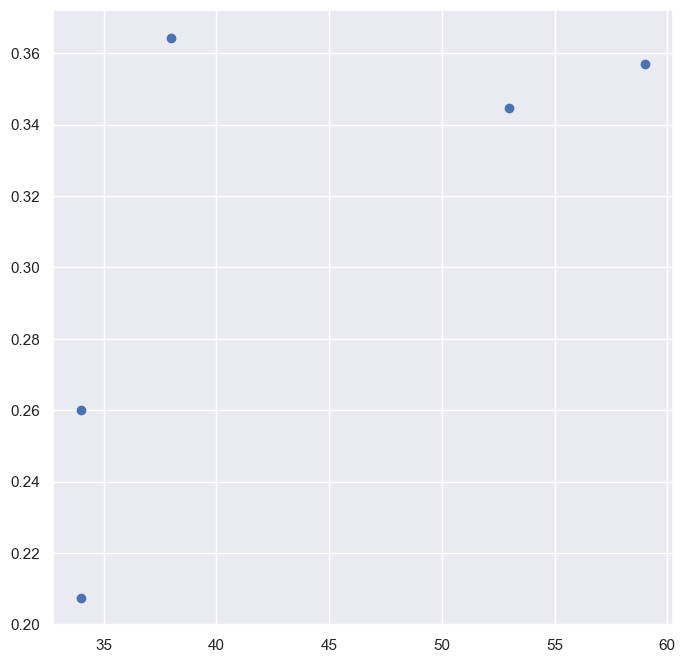

In [394]:
plt.scatter(full_corr["age"], corr_df["std"])

scipy.stats.pearsonr(full_corr["age"], corr_df["std"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="emotional_stability")
# scipy.stats.pearsonr(full_corr["emotional_stability"], df_corr["social_engagement_std"])

# sns.lmplot(data=full_corr, x="social_engagement_before", y="agreeableness")
# scipy.stats.pearsonr(full_corr["agreeableness"], df_corr["social_engagement_before"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="age")
# scipy.stats.pearsonr(full_corr["age"], df_corr["social_engagement_std"])

In [395]:
clus_df

,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,ID,OGINDEX,index,std,Framez,Zero,One,Two,Three,Four
0,0.354418,0.346744,0.346525,0.347150,0.348531,0.351058,0.353051,0.352289,0.349678,0.352459,...,1,550,5,0.285965,110.0,-45.427040,-12.975854,-4.319105,2.897359,0.126260
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,1550,15,0.381497,310.0,-42.968986,-27.197310,12.544586,-4.515748,-2.035433
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,2150,21,0.391355,430.0,41.004768,26.808321,-14.577596,5.719235,1.796028
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2350,23,0.114706,470.0,-10.653893,-3.337958,-4.571221,3.205816,0.666952
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2450,24,0.114706,490.0,-6.452743,4.990740,-5.515911,0.266103,1.363613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5,22750,227,0.327998,4550.0,-25.136331,-16.047401,7.944219,-3.567343,4.217893
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.556482,0.528162,0.514900,0.514475,...,2,22850,228,0.119873,4570.0,12.995601,-1.585439,0.366779,0.212774,-0.125778
64,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,23050,230,0.431601,4610.0,-25.226513,-11.463605,6.795954,-3.528531,12.730651
65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5,23450,234,0.132782,4690.0,-8.070066,-5.592891,3.557723,-1.130264,-2.758036


In [396]:
full_corr

,emotional_stability,extraversion,agreeableness,conscientiousness,intellect,helmet,group,age,ID,social_engagement_mean,ID,social_engagement_std,ID,social_engagement_after,ID,social_engagement_before,ID,social_engagement_delta
1,81.25,75.00,75.00,68.75,81.25,1,4,53,1,0.372745,1,0.473168,1,0.359571,1,0.385779,1,-0.026208
2,93.75,75.00,75.00,68.75,81.25,2,4,34,2,0.438348,2,0.473716,2,0.457912,2,0.419220,2,0.038692
3,75.00,75.00,75.00,87.50,68.75,3,4,59,3,0.441393,3,0.493208,3,0.458443,3,0.424925,3,0.033518
4,68.75,81.25,87.50,68.75,68.75,4,4,38,4,0.488021,4,0.499797,4,0.504023,4,0.471519,4,0.032504
5,62.50,81.25,93.75,81.25,56.25,5,4,34,5,0.361428,5,0.463190,5,0.384492,5,0.338881,5,0.045611


In [411]:
ahh_df = clus_df.groupby(['ID'])['Zero'].mean().reset_index()
ahh_df

,ID,Zero
0,1,13.520522
1,2,-11.927823
2,3,-5.955524
3,4,-17.771757
4,5,-15.599936


In [412]:
for cat in big5+ ["age"]:
    print("0 <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], ahh_df["Zero"])))
    print()

0 <-> emotional_stability: (r, p): PearsonRResult(statistic=0.35336801359439207, pvalue=0.5596251376481055) 

0 <-> extraversion: (r, p): PearsonRResult(statistic=-0.6621586218159379, pvalue=0.22339177243242633) 

0 <-> agreeableness: (r, p): PearsonRResult(statistic=-0.6258961556130259, pvalue=0.25870689871992525) 

0 <-> conscientiousness: (r, p): PearsonRResult(statistic=-0.15899571714143432, pvalue=0.7984165627824746) 

0 <-> intellect: (r, p): PearsonRResult(statistic=0.58673132796109, pvalue=0.29835544023124994) 

0 <-> age: (r, p): PearsonRResult(statistic=0.6809285221490701, pvalue=0.2056846224447549) 



### Detect if someone talking

In [948]:
import feat
from feat import Detector

# Define the function just to extract landmarks from images
detector = Detector(emotion_model='resmasknet', landmark_model="mobilefacenet", au_model='xgb', device='cpu')

detector

##try different model!!!!

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

In [20]:
video_prediction = detector.detect_video("videos/H1s.mp4", skip_frames=24)
video_prediction.head()

100%|███████████████████████████████████████| 248/248 [1:16:11<00:00, 18.43s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
0,532.563961,9.967422,780.827320,997.105448,0.992355,570.161365,570.395058,581.043308,603.839103,646.817455,...,0.000108,0.016044,0.000142,0.224129,0.131102,0.000431,0.628045,videos/H1s.mp4,0,00:00
24,531.064155,-4.842649,775.902687,999.974197,0.990961,563.114675,565.335809,579.351759,606.251386,652.944347,...,0.000072,0.003285,0.000030,0.470029,0.168435,0.000177,0.357972,videos/H1s.mp4,24,00:00
48,566.043095,-59.444923,804.724289,1072.035427,0.989011,569.165530,570.504059,584.957948,611.856668,654.867630,...,0.001277,0.007510,0.007431,0.139870,0.153835,0.019572,0.670504,videos/H1s.mp4,48,00:00
72,567.384453,-20.973644,818.857496,1061.639273,0.987186,531.454649,537.652810,557.953823,588.028309,632.719703,...,0.001197,0.003922,0.011565,0.352511,0.221603,0.313005,0.096198,videos/H1s.mp4,72,00:01
72,1435.308027,478.783121,55.583254,62.240325,0.880153,1442.385846,1440.565313,1440.196010,1439.958253,1439.866873,...,0.123673,0.323415,0.082240,0.279507,0.129806,0.024104,0.037254,videos/H1s.mp4,72,00:01


In [4]:
print(video_prediction.columns.tolist())

['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight', 'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', '

In [6]:
video_prediction['AU25'].mean()
# video_prediction['AU27'].max()
# video_prediction['AU22'].max()
# video_prediction['AU14'].max()
# video_prediction['AU26'].max()

0.24123338

In [10]:
mouth = video_prediction[["AU25", "AU26", "AU14"]]
mouth.iloc[150:180]

,AU25,AU26,AU14
frame,,,
3528,0.358712,0.341844,0.216655
3552,0.102041,0.096459,0.280882
3576,0.008942,0.105147,0.269985
3600,0.081196,0.202491,0.173768
3624,0.643201,0.119092,0.249561
3624,0.810326,0.097260,0.623785
3648,0.110290,0.127742,0.345433
3672,0.153207,0.177455,0.520680
3696,0.219818,0.155854,0.528218


In [14]:
talking = video_prediction.loc[(video_prediction['AU25'] >= 0.5)]
talking

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
264,591.579087,-26.218017,789.476197,1098.641643,0.993102,515.216702,529.333204,557.775862,597.789668,655.236249,...,0.031109,0.367999,0.000057,0.135266,0.064460,0.000655,0.400454,H1s.mp4,264,00:04
1200,525.997361,-8.271468,746.943807,1016.173981,0.991313,534.166858,533.849926,546.408360,572.901413,620.165778,...,0.000046,0.003605,0.000018,0.409804,0.062236,0.000164,0.524127,H1s.mp4,1200,00:20
1248,1498.122615,687.432755,84.358451,107.830941,0.624091,1511.742292,1509.421750,1508.051610,1508.550142,1511.747005,...,0.203197,0.015897,0.067014,0.151678,0.147333,0.220850,0.194031,H1s.mp4,1248,00:20
1320,546.287795,14.122174,756.349073,1044.342746,0.978113,564.009824,559.176466,565.601136,589.165493,635.686488,...,0.001633,0.084090,0.097418,0.023050,0.215011,0.520795,0.058002,H1s.mp4,1320,00:22
1368,513.497846,-6.151719,799.598827,1065.187153,0.980322,535.524606,531.294184,540.687170,569.248573,621.560805,...,0.001277,0.090113,0.045880,0.002214,0.262585,0.438779,0.159152,H1s.mp4,1368,00:22
1704,432.882462,-17.776801,799.160566,1057.115303,0.979189,417.602811,426.607488,450.996897,485.289202,532.116828,...,0.004257,0.028767,0.023161,0.046258,0.374559,0.212014,0.310985,H1s.mp4,1704,00:28
1776,546.743611,-19.952512,787.712794,1046.410364,0.984833,510.021580,522.033021,547.886652,583.226638,634.752532,...,0.004123,0.041140,0.003948,0.753849,0.030477,0.056803,0.109658,H1s.mp4,1776,00:29
1800,527.946610,-20.495589,797.871765,1045.259944,0.990759,516.868949,524.077561,543.957368,574.012974,619.488784,...,0.003225,0.026472,0.000968,0.803050,0.040066,0.008930,0.117288,H1s.mp4,1800,00:30
1848,634.841961,5.431215,772.625686,968.795452,0.988635,624.733573,626.228497,641.799387,666.408663,701.810650,...,0.000248,0.013727,0.005572,0.432853,0.253508,0.226653,0.067438,H1s.mp4,1848,00:30


In [ ]:
#split video into frames
#ffmpeg -i videos/CROP/H1CROP.mp4 -vf fps=1 "videos/CROP/frames/group4/H1-frame%05d.png"